# Project 3

This notebook follows the tutorial found here https://www.youtube.com/watch?v=sHWKN5dakPw

In [1]:
### Import Dependancies

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.colors as mcolors

import random
import math
import time

from sklearn.model_selection import RandomizedSearchCV, train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator
plt.style.use('seaborn')

#### Import Data Set


In [153]:
whoURL = 'https://covid19.who.int/WHO-COVID-19-global-data.csv'
who_data = pd.read_csv(whoURL)

In [3]:
who_data.tail(5)

Date_reported  Country_code   Country  WHO_region   New_cases  \
28089    2020-07-09            ZW  Zimbabwe        AFRO          98   
28090    2020-07-10            ZW  Zimbabwe        AFRO          41   
28091    2020-07-11            ZW  Zimbabwe        AFRO          16   
28092    2020-07-12            ZW  Zimbabwe        AFRO          40   
28093    2020-07-13            ZW  Zimbabwe        AFRO           3   

        Cumulative_cases   New_deaths   Cumulative_deaths  
28089                885            0                   9  
28090                926            3                  12  
28091                942            1                  13  
28092                982            5                  18  
28093                985            0                  18

In [4]:
cols = who_data.keys()
cols

Index(['Date_reported', ' Country_code', ' Country', ' WHO_region',
       ' New_cases', ' Cumulative_cases', ' New_deaths', ' Cumulative_deaths'],
      dtype='object')

In [5]:
# Drop rows that have missing values
print(who_data.shape)
who_data.dropna(inplace=True)
print(who_data.shape)

(28094, 8)
(27972, 8)


In [6]:
# reconfigure the data so we have just cases
# Note this is the number of cases per day for all countries
# So one row and over 26K columns

cases = who_data.filter(['Date_reported', ' New_cases'], axis = 1)
cases = cases.groupby('Date_reported', as_index=False).sum()
cases.head(3)

Date_reported   New_cases
0    2020-01-11          41
1    2020-01-12           0
2    2020-01-13           1

In [7]:
# reconfigure the data so we have just deaths
deaths = who_data.filter(['Date_reported', ' New_deaths'], axis = 1)
deaths = deaths.groupby('Date_reported', as_index=False).sum()
deaths.head(3)

Date_reported   New_deaths
0    2020-01-11            1
1    2020-01-12            0
2    2020-01-13            0

In [19]:
# reconfigure the data so we have just deaths
cumulative_deaths = who_data.filter(['Date_reported', ' Cumulative_deaths'], axis = 1)
cumulative_deaths = cumulative_deaths.groupby('Date_reported', as_index=False).sum()
cumulative_deaths.head(3)

Date_reported   Cumulative_deaths
0    2020-01-11                   1
1    2020-01-12                   1
2    2020-01-13                   1

In [9]:
# reconfigure the data so we have just deaths
cumulative_cases = who_data.filter(['Date_reported', ' Cumulative_cases'], axis = 1)
cumulative_cases = cumulative_cases.groupby('Date_reported', as_index=False).sum()
cumulative_cases.tail(3)

Date_reported   Cumulative_cases
183    2020-07-12           12552055
184    2020-07-13           12767522
185    2020-07-14            9526045

In [10]:
earliest_reported = who_data['Date_reported'].min()
earliest_reported
last_updated = who_data['Date_reported'].max()
last_updated


'2020-07-14'

In [11]:
dates = cases['Date_reported']
dates

0      2020-01-11
1      2020-01-12
2      2020-01-13
3      2020-01-14
4      2020-01-15
          ...    
181    2020-07-10
182    2020-07-11
183    2020-07-12
184    2020-07-13
185    2020-07-14
Name: Date_reported, Length: 186, dtype: object

In [13]:
cc = np.array(cumulative_cases[' Cumulative_cases'])
cc

array([      41,       41,       42,       43,       43,       43,
             48,       65,      125,      203,      296,      450,
            583,      854,     1323,     2021,     2806,     4595,
           6076,     7836,     9846,    11961,    14559,    17391,
          20649,    24563,    28284,    31486,    34899,    37568,
          40623,    43109,    45174,    60387,    64455,    67187,
          69277,    71438,    73431,    75287,    75773,    76817,
          77926,    78942,    79566,    80392,    81316,    82685,
          84133,    85959,    87850,    90131,    92463,    94663,
          97440,   101240,   105166,   108904,   112951,   117439,
         123964,   130483,   140126,   151636,   163489,   175280,
         190104,   208533,   232509,   265401,   288849,   298185,
         331907,   391864,   422395,   478118,   519722,   582513,
         644250,   701942,   760029,   833723,   907004,   982209,
        1062266,  1142094,  1219079,  1288420,  1362610,  1445

In [14]:
world_cases=cc
world_cases

array([      41,       41,       42,       43,       43,       43,
             48,       65,      125,      203,      296,      450,
            583,      854,     1323,     2021,     2806,     4595,
           6076,     7836,     9846,    11961,    14559,    17391,
          20649,    24563,    28284,    31486,    34899,    37568,
          40623,    43109,    45174,    60387,    64455,    67187,
          69277,    71438,    73431,    75287,    75773,    76817,
          77926,    78942,    79566,    80392,    81316,    82685,
          84133,    85959,    87850,    90131,    92463,    94663,
          97440,   101240,   105166,   108904,   112951,   117439,
         123964,   130483,   140126,   151636,   163489,   175280,
         190104,   208533,   232509,   265401,   288849,   298185,
         331907,   391864,   422395,   478118,   519722,   582513,
         644250,   701942,   760029,   833723,   907004,   982209,
        1062266,  1142094,  1219079,  1288420,  1362610,  1445

In [15]:
dates

0      2020-01-11
1      2020-01-12
2      2020-01-13
3      2020-01-14
4      2020-01-15
          ...    
181    2020-07-10
182    2020-07-11
183    2020-07-12
184    2020-07-13
185    2020-07-14
Name: Date_reported, Length: 186, dtype: object

In [18]:
cumulative_deaths

[]

In [20]:
cdts = np.array(cumulative_deaths[' Cumulative_deaths'])
cdts
total_deaths=cdts

In [21]:
# MAKE ARRAYS FOR PREDICTIONS 

In [22]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases     = np.array(world_cases).reshape(-1, 1)
total_deaths    = np.array(total_deaths).reshape(-1, 1)

In [23]:
days_since_1_22

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [24]:
total_deaths

array([[     1],
       [     1],
       [     1],
       [     1],
       [     1],
       [     1],
       [     2],
       [     2],
       [     3],
       [     4],
       [     6],
       [     9],
       [    17],
       [    25],
       [    41],
       [    56],
       [    80],
       [   106],
       [   132],
       [   170],
       [   213],
       [   259],
       [   305],
       [   362],
       [   426],
       [   492],
       [   565],
       [   638],
       [   724],
       [   813],
       [   910],
       [  1018],
       [  1115],
       [  1371],
       [  1384],
       [  1528],
       [  1670],
       [  1776],
       [  1874],
       [  2012],
       [  2130],
       [  2250],
       [  2363],
       [  2464],
       [  2628],
       [  2711],
       [  2772],
       [  2815],
       [  2874],
       [  2942],
       [  2987],
       [  3074],
       [  3154],
       [  3245],
       [  3346],
       [  3459],
       [  3554],
       [  3800],
       [  4005

In [25]:
world_cases

array([[      41],
       [      41],
       [      42],
       [      43],
       [      43],
       [      43],
       [      48],
       [      65],
       [     125],
       [     203],
       [     296],
       [     450],
       [     583],
       [     854],
       [    1323],
       [    2021],
       [    2806],
       [    4595],
       [    6076],
       [    7836],
       [    9846],
       [   11961],
       [   14559],
       [   17391],
       [   20649],
       [   24563],
       [   28284],
       [   31486],
       [   34899],
       [   37568],
       [   40623],
       [   43109],
       [   45174],
       [   60387],
       [   64455],
       [   67187],
       [   69277],
       [   71438],
       [   73431],
       [   75287],
       [   75773],
       [   76817],
       [   77926],
       [   78942],
       [   79566],
       [   80392],
       [   81316],
       [   82685],
       [   84133],
       [   85959],
       [   87850],
       [   90131],
       [   9

In [26]:
days_in_future  = 30  # WE WILL GO 30 DAYS INTO THE FUTURE
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates  = future_forecast[:-30]

In [27]:
future_forecast

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [ ]:
#### Convert to date time values for easier viz

In [28]:
start = '1/22/2020'
start = earliest_reported
start_date = datetime.datetime.strptime(start, '%Y-%m-%d')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime( '%m/%d/%Y'))

In [ ]:
##### TODO SOME VISUALIZATIONS HERE...

### Machine Learning

### All Countries by date

In [31]:
## Split the data
X_train_confirmed, X_test_confirmed,y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.3)


#building SVM Model
kernel = ['poly', 'sigmoid', 'rbf']
c = [0.01, 0.1, 1]
gamma = [0.01, 0.1]
epsilon = [0.01, 0.1, 1]
shrinking = [True, False]
svm_grid = {'kernel':kernel, 'C':c, 'gamma':gamma, 'epsilon':epsilon, 'shrinking':shrinking}

svm = SVR()
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv = 3, n_jobs=-1, return_train_score=True, verbose =1)


In [32]:
svm_search.fit(X_train_confirmed, y_train_confirmed)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    6.9s finished
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1],
                                        'epsilon': [0.01, 0.1, 1],
                                        'gamma': [0.01, 0.1],
                                        'kernel': ['poly', 'sigmoid', 'rbf'],
                                        'shrinking': [True, False]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [33]:
svm_search.best_params_

{'shrinking': False, 'kernel': 'poly', 'gamma': 0.1, 'epsilon': 0.01, 'C': 1}

In [34]:
svm_confirmed = svm_search.best_estimator_
svm_pred      = svm_confirmed.predict(future_forecast)

In [35]:
svm_confirmed

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma=0.1,
    kernel='poly', max_iter=-1, shrinking=False, tol=0.001, verbose=False)

In [36]:
svm_pred.size

216

Mean Absolute Error 153768.05961751772
Mean Squared Error 46632344945.03613


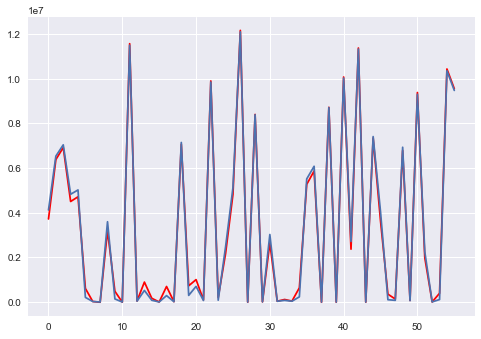

In [37]:
# Check against testing data

svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(svm_test_pred, color='RED') #Predicted.
plt.plot(y_test_confirmed)   #Actual

print ('Mean Absolute Error', mean_absolute_error(svm_test_pred, y_test_confirmed))
print ('Mean Squared Error',  mean_squared_error(svm_test_pred, y_test_confirmed))

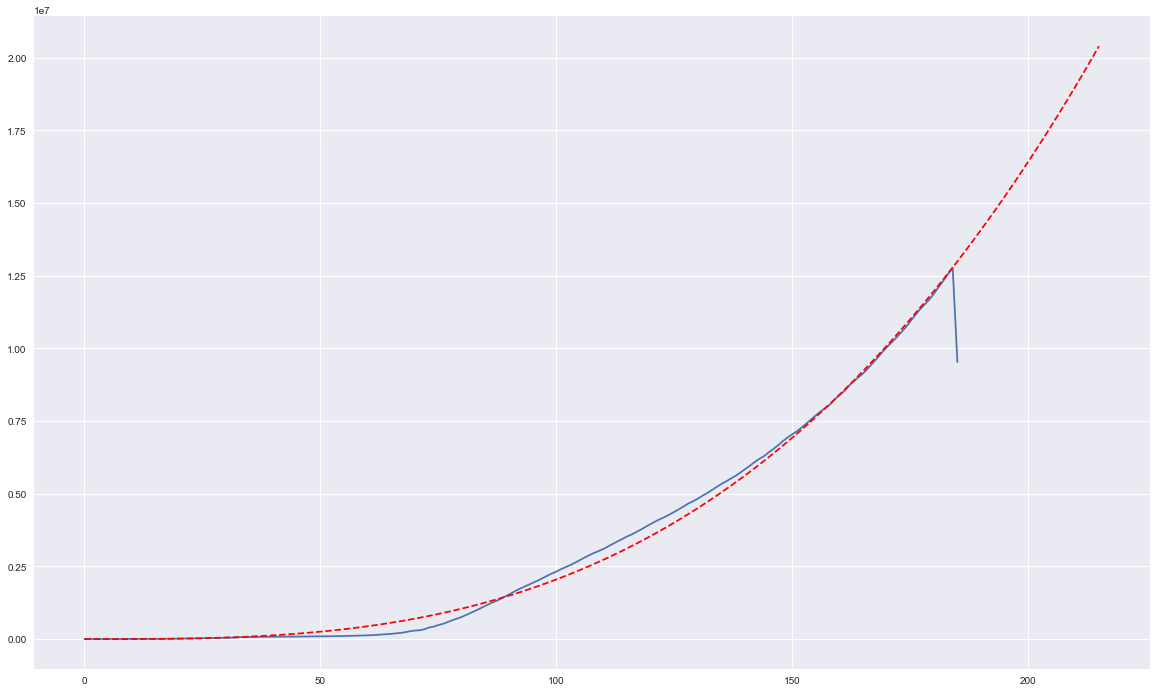

In [38]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases)
_ = plt.plot(future_forecast, svm_pred, linestyle='dashed', color='red')           

In [39]:
future_forecast_dates

['01/11/2020',
 '01/12/2020',
 '01/13/2020',
 '01/14/2020',
 '01/15/2020',
 '01/16/2020',
 '01/17/2020',
 '01/18/2020',
 '01/19/2020',
 '01/20/2020',
 '01/21/2020',
 '01/22/2020',
 '01/23/2020',
 '01/24/2020',
 '01/25/2020',
 '01/26/2020',
 '01/27/2020',
 '01/28/2020',
 '01/29/2020',
 '01/30/2020',
 '01/31/2020',
 '02/01/2020',
 '02/02/2020',
 '02/03/2020',
 '02/04/2020',
 '02/05/2020',
 '02/06/2020',
 '02/07/2020',
 '02/08/2020',
 '02/09/2020',
 '02/10/2020',
 '02/11/2020',
 '02/12/2020',
 '02/13/2020',
 '02/14/2020',
 '02/15/2020',
 '02/16/2020',
 '02/17/2020',
 '02/18/2020',
 '02/19/2020',
 '02/20/2020',
 '02/21/2020',
 '02/22/2020',
 '02/23/2020',
 '02/24/2020',
 '02/25/2020',
 '02/26/2020',
 '02/27/2020',
 '02/28/2020',
 '02/29/2020',
 '03/01/2020',
 '03/02/2020',
 '03/03/2020',
 '03/04/2020',
 '03/05/2020',
 '03/06/2020',
 '03/07/2020',
 '03/08/2020',
 '03/09/2020',
 '03/10/2020',
 '03/11/2020',
 '03/12/2020',
 '03/13/2020',
 '03/14/2020',
 '03/15/2020',
 '03/16/2020',
 '03/17/20

In [43]:
print("SVM FUTURE")
set(zip(future_forecast_dates[-30:], svm_pred[-30:]))

SVM FUTURE


{('07/15/2020', 13204339.79067096),
 ('07/16/2020', 13418574.445739953),
 ('07/17/2020', 13635112.677246122),
 ('07/18/2020', 13853966.803647606),
 ('07/19/2020', 14075149.143631248),
 ('07/20/2020', 14298672.015762893),
 ('07/21/2020', 14524547.738548784),
 ('07/22/2020', 14752788.630726544),
 ('07/23/2020', 14983407.01074305),
 ('07/24/2020', 15216415.197326927),
 ('07/25/2020', 15451825.509025065),
 ('07/26/2020', 15689650.264301626),
 ('07/27/2020', 15929901.781843094),
 ('07/28/2020', 16172592.380315213),
 ('07/29/2020', 16417734.378189353),
 ('07/30/2020', 16665340.09413263),
 ('07/31/2020', 16915421.84667203),
 ('08/01/2020', 17167991.954541475),
 ('08/02/2020', 17423062.73603353),
 ('08/03/2020', 17680646.510010034),
 ('08/04/2020', 17940755.59498754),
 ('08/05/2020', 18203402.30953887),
 ('08/06/2020', 18468598.972289354),
 ('08/07/2020', 18736357.90176764),
 ('08/08/2020', 19006691.41656521),
 ('08/09/2020', 19279611.835339457),
 ('08/10/2020', 19555131.476623327),
 ('08/11/2

In [49]:
predicted_cases = svm_pred

In [305]:
#predicted_cases

# Predicted Deaths

In [51]:
## Split the data
X_train_confirmed, X_test_confirmed,y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, total_deaths, test_size=0.3)


#building SVM Model
kernel = ['poly', 'sigmoid', 'rbf']
c = [0.01, 0.1, 1 ]
gamma = [0.01, 0.1]
epsilon = [0.01, 0.1]
shrinking = [True, False]
svm_grid = {'kernel':kernel, 'C':c, 'gamma':gamma, 'epsilon':epsilon, 'shrinking':shrinking}

svm = SVR()
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv = 3, n_jobs=-1, return_train_score=True, verbose =1)


In [52]:
svm_search.fit(X_train_confirmed, y_train_confirmed)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.2s finished
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1],
                                        'epsilon': [0.01, 0.1],
                                        'gamma': [0.01, 0.1],
                                        'kernel': ['poly', 'sigmoid', 'rbf'],
                                        'shrinking': [True, False]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [53]:
svm_search.best_params_

{'shrinking': False, 'kernel': 'poly', 'gamma': 0.01, 'epsilon': 0.1, 'C': 0.1}

In [54]:
svm_confirmed = svm_search.best_estimator_
svm_pred      = svm_confirmed.predict(future_forecast)

Mean Absolute Error 39565.61222574028
Mean Squared Error 4794294637.46363


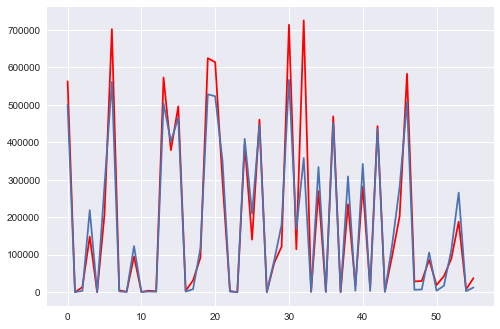

In [55]:
# Check against testing data

svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(svm_test_pred, color='RED') #Predicted.
plt.plot(y_test_confirmed)   #Actual

print ('Mean Absolute Error', mean_absolute_error(svm_test_pred, y_test_confirmed))
print ('Mean Squared Error',  mean_squared_error(svm_test_pred, y_test_confirmed))

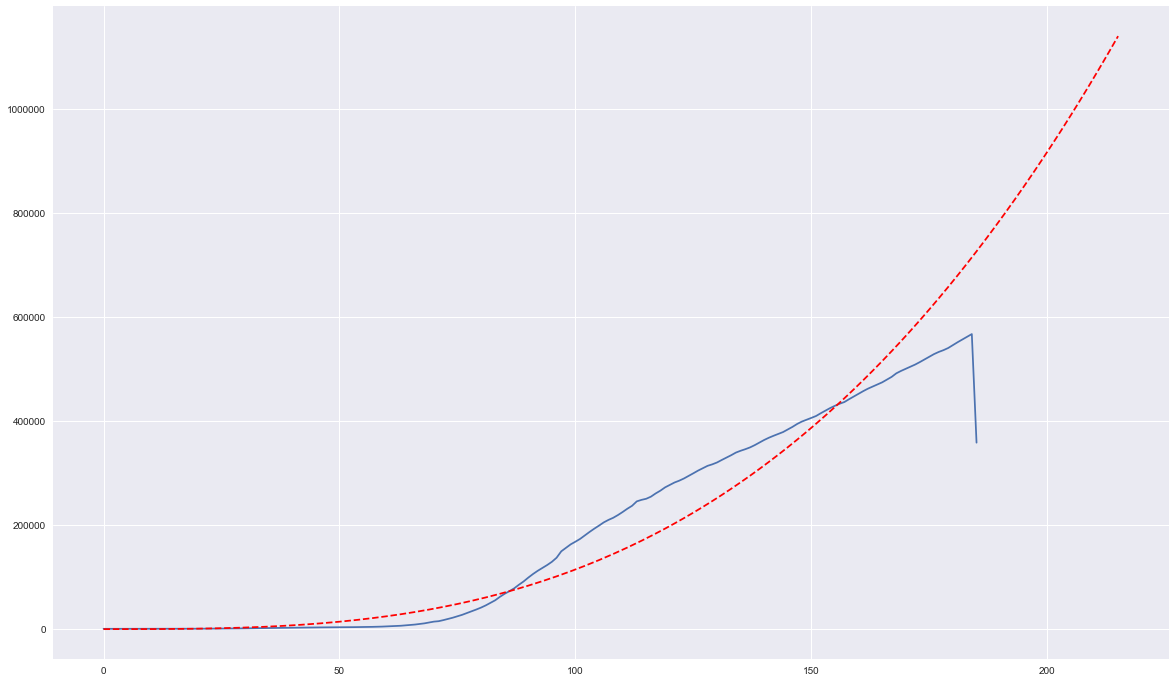

In [56]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_deaths)
_ = plt.plot(future_forecast, svm_pred, linestyle='dashed', color='red')     

In [57]:
predicted_deaths = svm_pred
predicted_deaths

array([-6.16918042e+02, -6.16803329e+02, -6.16000336e+02, -6.13820784e+02,
       -6.09576395e+02, -6.02578887e+02, -5.92139983e+02, -5.77571401e+02,
       -5.58184864e+02, -5.33292092e+02, -5.02204805e+02, -4.64234723e+02,
       -4.18693568e+02, -3.64893060e+02, -3.02144919e+02, -2.29760866e+02,
       -1.47052622e+02, -5.33319075e+01,  5.20895575e+01,  1.69900052e+02,
        3.00787856e+02,  4.45441248e+02,  6.04548508e+02,  7.78797915e+02,
        9.68877749e+02,  1.17547629e+03,  1.39928182e+03,  1.64098261e+03,
        1.90126694e+03,  2.18082310e+03,  2.48033936e+03,  2.80050401e+03,
        3.14200531e+03,  3.50553156e+03,  3.89177103e+03,  4.30141200e+03,
        4.73514275e+03,  5.19365156e+03,  5.67762671e+03,  6.18775648e+03,
        6.72472914e+03,  7.28923298e+03,  7.88195628e+03,  8.50358731e+03,
        9.15481436e+03,  9.83632570e+03,  1.05488096e+04,  1.12929544e+04,
        1.20694483e+04,  1.28789796e+04,  1.37222366e+04,  1.45999076e+04,
        1.55126808e+04,  

# Worst Affected Countries

In [ ]:
# Have a function to go through each country one by one and create a new .csvfile. 

In [303]:
# unique_countries = list(who_data[' Country'].unique())
# len(unique_countries)

In [310]:
def one_country(country_name, feature):
    one_country = who_data[who_data[' Country']==country_name]
    print("Processing: ", country_name)
    #print(one_country)
    
    # reconfigure the data so we have just deaths
    X = one_country.filter(['Date_reported', feature], axis = 1)
    X = X.groupby('Date_reported', as_index=False).sum()
    #print(X.tail(3))
    
    y = np.array(X[feature])
    
    one_cases  = np.array(y).reshape(-1, 1)
    print("ONE", one_cases)
    dates = X['Date_reported']

    days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
   
    days_in_future  = 30  # WE WILL GO 30 DAYS INTO THE FUTURE
    future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
    
    adjusted_dates  = future_forecast[:-30]
    
    print(len(future_forecast))
    ## Split the data
    X_train_confirmed, X_test_confirmed,y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, one_cases, test_size=0.2)


    #building SVM Model
    kernel = ['poly', 'sigmoid', 'rbf']
    c = [0.01, 0.1, 1 ]
    gamma = [0.01, 0.1]
    epsilon = [0.01, 0.1]
    shrinking = [True, False]
    svm_grid = {'kernel':kernel, 'C':c, 'gamma':gamma, 'epsilon':epsilon, 'shrinking':shrinking}

    svm = SVR()
    svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv = 3, n_jobs=-1, return_train_score=True, verbose =1)

    svm_search.fit(X_train_confirmed, y_train_confirmed)  
    
    
    svm_search.best_params_
    svm_confirmed = svm_search.best_estimator_
    svm_pred      = svm_confirmed.predict(future_forecast)
    
    # Check against testing data

    svm_test_pred = svm_confirmed.predict(X_test_confirmed)
    plt.figure()
    plt.title(country_name.upper() + ': ' + feature + ' Test the model (y_test) (blue), Predicted (red)')
    plt.plot(svm_test_pred, color='RED') #Predicted.
    plt.plot(y_test_confirmed)   #Actual

    print ('Mean Absolute Error', mean_absolute_error(svm_test_pred, y_test_confirmed))
    print ('Mean Squared Error',  mean_squared_error(svm_test_pred, y_test_confirmed))
    
    plt.figure(figsize=(20, 12))
    plt.title(country_name.upper() + ": " + feature + ' (blue), Predicted (red)')
    plt.plot(adjusted_dates, one_cases)
    _ = plt.plot(future_forecast, svm_pred, linestyle='dashed', color='red')  
    
    return(svm_pred)

In [311]:
worst_affected_countries = ['Brazil', 'Germany', 'India','Iran (Islamic Republic of)', 'Italy', 'Russian Federation', 'Spain', 'The United Kingdom', 'Turkey', 'United States of America' ]

Brazil
Processing:  Brazil
ONE [[      1]
 [      1]
 [      1]
 [      1]
 [      2]
 [      2]
 [      2]
 [      3]
 [      7]
 [      8]
 [     19]
 [     19]
 [     25]
 [     25]
 [     34]
 [     52]
 [     98]
 [    121]
 [    121]
 [    200]
 [    234]
 [    291]
 [    428]
 [    621]
 [    904]
 [    904]
 [    904]
 [   2201]
 [   2201]
 [   2433]
 [   2433]
 [   2915]
 [   3417]
 [   3904]
 [   4256]
 [   4579]
 [   5717]
 [   6836]
 [   7910]
 [   9056]
 [  10278]
 [  11130]
 [  12056]
 [  13717]
 [  15927]
 [  17857]
 [  19638]
 [  20727]
 [  22169]
 [  23430]
 [  25262]
 [  28320]
 [  30425]
 [  33682]
 [  36599]
 [  38654]
 [  40581]
 [  43079]
 [  45757]
 [  49492]
 [  52995]
 [  58509]
 [  61888]
 [  66501]
 [  71886]
 [  78162]
 [  85380]
 [  91589]
 [  96559]
 [ 101147]
 [ 107780]
 [ 114715]
 [ 125218]
 [ 135106]
 [ 145328]
 [ 155939]
 [ 162699]
 [ 168331]
 [ 177589]
 [ 188974]
 [ 202918]
 [ 218223]
 [ 233142]
 [ 241080]
 [ 254220]
 [ 271628]
 [ 291579]
 [ 310087]
 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.2s finished
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.0s finished
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Mean Absolute Error 51306.54980629747
Mean Squared Error 3503371062.4169617
Processing:  Brazil
ONE [[    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    1]
 [    4]
 [    4]
 [   11]
 [   11]
 [   11]
 [   46]
 [   46]
 [   57]
 [   57]
 [   77]
 [   92]
 [  114]
 [  136]
 [  159]
 [  201]
 [  241]
 [  299]
 [  359]
 [  432]
 [  486]
 [  553]
 [  667]
 [  800]
 [  941]
 [ 1056]
 [ 1124]
 [ 1223]
 [ 1328]
 [ 1532]
 [ 1736]
 [ 1924]
 [ 2141]
 [ 2347]
 [ 2462]
 [ 2575]
 [ 2741]
 [ 2906]
 [ 3313]
 [ 3670]
 [ 4016]
 [ 4205]
 [ 4543]
 [ 5017]
 [ 5466]
 [ 5901]
 [ 6329]
 [ 6750]
 [ 7025]
 [ 7321]
 [ 7921]
 [ 8536]
 [ 9146]
 [ 9897]
 [10627]
 [11123]
 [11519]
 [12400]
 [13149]
 [13993]
 [14817]
 [15633]
 [16118]
 [16792]
 [17971]
 [18859]
 [20047]
 [21048]
 [22013]
 [22666]
 [23473]
 [24512]
 [25598]
 [26754]
 [27878]
 [28834]
 [29314]
 [29937]
 [31199]


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   13.2s finished
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Mean Absolute Error 3143.6308289979124
Mean Squared Error 41590791.8176694
Processing:  Brazil
ONE [[   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   1]
 [   3]
 [   0]
 [   7]
 [   0]
 [   0]
 [  35]
 [   0]
 [  11]
 [   0]
 [  20]
 [  15]
 [  22]
 [  22]
 [  23]
 [  42]
 [  40]
 [  58]
 [  60]
 [  73]
 [  54]
 [  67]
 [ 114]
 [ 133]
 [ 141]
 [ 115]
 [  68]
 [  99]
 [ 105]
 [ 204]
 [ 204]
 [ 188]
 [ 217]
 [ 206]
 [ 115]
 [ 113]
 [ 166]
 [ 165]
 [ 407]
 [ 357]
 [ 346]
 [ 189]
 [ 338]
 [ 474]
 [ 449]
 [ 435]
 [ 428]
 [ 421]
 [ 275]
 [ 296]
 [ 600]
 [ 615]
 [ 610]
 [ 751]
 [ 730]
 [ 496]
 [ 396]
 [ 881]
 [ 749]
 [ 844]
 [ 824]
 [ 816]
 [ 485]
 [ 674]
 [1179]
 [ 888]
 [1188]
 [1001]
 [ 965]
 [ 653]
 [ 807]
 [1039]
 [1086]
 [1156]
 [1124]
 [ 956]
 [ 480]
 [ 623]
 [1262]
 [1349]
 [1473]
 [1005]
 [ 904]
 [ 525]
 [ 679]
 [1272]
 [1274]
 [1239]
 [ 909]
 [ 892]
 [ 612]
 [ 62

[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:   25.6s remaining:    7.8s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  3.5min finished
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.1s finished
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Mean Absolute Error 268.08918366662925
Mean Squared Error 142221.98253559644
Germany
Processing:  Germany
ONE [[     4]
 [     4]
 [     4]
 [     7]
 [     8]
 [    10]
 [    10]
 [    12]
 [    12]
 [    13]
 [    14]
 [    14]
 [    14]
 [    14]
 [    16]
 [    16]
 [    16]
 [    16]
 [    16]
 [    16]
 [    16]
 [    16]
 [    16]
 [    16]
 [    16]
 [    16]
 [    16]
 [    16]
 [    18]
 [    21]
 [    26]
 [    57]
 [    57]
 [   129]
 [   158]
 [   196]
 [   262]
 [   400]
 [   639]
 [   795]
 [   902]
 [  1139]
 [  1296]
 [  1567]
 [  1567]
 [  2260]
 [  3795]
 [  4838]
 [  6012]
 [  7156]
 [  8198]
 [ 10999]
 [ 18323]
 [ 21463]
 [ 21463]
 [ 24774]
 [ 29212]
 [ 31554]
 [ 36508]
 [ 42288]
 [ 48582]
 [ 52547]
 [ 57298]
 [ 61913]
 [ 67366]
 [ 73522]
 [ 79696]
 [ 85778]
 [ 91714]
 [ 95391]
 [ 99225]
 [103228]
 [108202]
 [113525]
 [117658]
 [120479]
 [123016]
 [125098]
 [127584]
 [130450]
 [133830]
 [137439]
 [139897]
 [141672]
 [143457]
 [145694]
 [148046]
 [150383]
 [152438]


[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.5s finished
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error 1505.1601560617075
Mean Squared Error 4614691.901154897
Processing:  Germany
ONE [[   4]
 [   0]
 [   0]
 [   3]
 [   1]
 [   2]
 [   0]
 [   2]
 [   0]
 [   1]
 [   1]
 [   0]
 [   0]
 [   0]
 [   2]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   2]
 [   3]
 [   5]
 [  31]
 [   0]
 [  72]
 [  29]
 [  38]
 [  66]
 [ 138]
 [ 239]
 [ 156]
 [ 107]
 [ 237]
 [ 157]
 [ 271]
 [   0]
 [ 693]
 [1535]
 [1043]
 [1174]
 [1144]
 [1042]
 [2801]
 [7324]
 [3140]
 [   0]
 [3311]
 [4438]
 [2342]
 [4954]
 [5780]
 [6294]
 [3965]
 [4751]
 [4615]
 [5453]
 [6156]
 [6174]
 [6082]
 [5936]
 [3677]
 [3834]
 [4003]
 [4974]
 [5323]
 [4133]
 [2821]
 [2537]
 [2082]
 [2486]
 [2866]
 [3380]
 [3609]
 [2458]
 [1775]
 [1785]
 [2237]
 [2352]
 [2337]
 [2055]
 [1737]
 [1018]
 [1144]
 [1304]
 [1478]
 [   0]
 [2584]
 [ 793]
 [ 679]
 [ 685]
 [1037]
 [1194]
 [1209]
 [1251]
 [ 667]
 [ 357]
 [ 933]
 [ 798]
 [ 933]
 [ 913]
 [ 620]
 [ 583]
 [ 342]
 [ 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.5s finished
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error 1466.609416416749
Mean Squared Error 6031062.051591039
Processing:  Germany
ONE [[  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  2]
 [  0]
 [  1]
 [  0]
 [  0]
 [  5]
 [  4]
 [  0]
 [  0]
 [  0]
 [  8]
 [ 25]
 [ 22]
 [  0]
 [ 27]
 [ 32]
 [ 23]
 [ 49]
 [ 55]
 [ 72]
 [ 64]
 [ 66]
 [128]
 [149]
 [140]
 [145]
 [141]
 [184]
 [ 92]
 [173]
 [254]
 [246]
 [266]
 [171]
 [129]
 [126]
 [170]
 [285]
 [315]
 [299]
 [242]
 [184]
 [110]
 [194]
 [281]
 [215]
 [227]
 [179]
 [140]
 [110]
 [163]
 [202]
 [173]
 [  0]
 [287]
 [ 74]
 [ 43]
 [139]
 [165]
 [123]
 [147]
 [103]
 [ 26]
 [ 22]
 [116]
 [101]
 [ 89]
 [101]
 [ 57]
 [ 33]
 [ 21]
 [ 72]
 [ 83]
 [ 57]
 [ 27]
 [ 42]
 [ 31]
 [ 10]
 [ 45]
 [ 47]
 [ 62]
 [ 39]
 [ 39]
 [ 11]
 [ 11]
 [ 11]
 [ 29]
 [ 3

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:    4.7s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   43.9s finished
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Mean Absolute Error 54.98158080212188
Mean Squared Error 8095.405327110149
India
Processing:  India
ONE [[     1]
 [     1]
 [     1]
 [     2]
 [     3]
 [     3]
 [     3]
 [     3]
 [     3]
 [     3]
 [     3]
 [     3]
 [     3]
 [     3]
 [     3]
 [     3]
 [     3]
 [     3]
 [     3]
 [     3]
 [     3]
 [     3]
 [     3]
 [     3]
 [     3]
 [     3]
 [     3]
 [     3]
 [     3]
 [     3]
 [     3]
 [     3]
 [     5]
 [     5]
 [    27]
 [    29]
 [    31]
 [    34]
 [    39]
 [    44]
 [    50]
 [    60]
 [    74]
 [    81]
 [    84]
 [   107]
 [   114]
 [   137]
 [   151]
 [   195]
 [   195]
 [   283]
 [   341]
 [   434]
 [   519]
 [   606]
 [   649]
 [   724]
 [   724]
 [   979]
 [  1071]
 [  1251]
 [  1636]
 [  1965]
 [  2301]
 [  2902]
 [  3374]
 [  4067]
 [  4421]
 [  5274]
 [  5865]
 [  6412]
 [  7447]
 [  8356]
 [  9152]
 [ 10363]
 [ 11439]
 [ 12380]
 [ 13387]
 [ 14378]
 [ 15712]
 [ 17265]
 [ 18601]
 [ 19984]
 [ 21393]
 [ 23077]
 [ 24506]
 [ 26496]
 [ 27892]
 [ 294

[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.5s finished
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error 43118.2727337288
Mean Squared Error 4218432530.7588186
Processing:  India
ONE [[    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    1]
 [    2]
 [    2]
 [    2]
 [    3]
 [    3]
 [    4]
 [    4]
 [    4]
 [    5]
 [    9]
 [    9]
 [   10]
 [   13]
 [   17]
 [   17]
 [   25]
 [   29]
 [   32]
 [   38]
 [   50]
 [   56]
 [   68]
 [   77]
 [  109]
 [  114]
 [  149]
 [  169]
 [  199]
 [  239]
 [  273]
 [  308]
 [  339]
 [  377]
 [  414]
 [  437]
 [  480]
 [  507]
 [  543]
 [  590]
 [  640]
 [  681]
 [  718]
 [  775]
 [  824]
 [  872]
 [  934]
 [ 1007]
 [ 1074]
 [ 1147]
 [ 1218]
 [ 1301]
 [ 1373]
 [ 1568]
 [ 1694]
 [ 1783]
 [ 1886]
 [

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.3s finished
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error 1200.2492809960775
Mean Squared Error 2175230.3551536165
Processing:  India
ONE [[    1]
 [    0]
 [    0]
 [    1]
 [    1]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    2]
 [    0]
 [   22]
 [    2]
 [    2]
 [    3]
 [    5]
 [    5]
 [    6]
 [   10]
 [   14]
 [    7]
 [    3]
 [   23]
 [    7]
 [   23]
 [   14]
 [   44]
 [    0]
 [   88]
 [   58]
 [   93]
 [   85]
 [   87]
 [   43]
 [   75]
 [    0]
 [  255]
 [   92]
 [  180]
 [  385]
 [  329]
 [  336]
 [  601]
 [  472]
 [  693]
 [  354]
 [  853]
 [  591]
 [  547]
 [ 1035]
 [  909]
 [  796]
 [ 1211]
 [ 1076]
 [  941]
 [ 1007]
 [  991]
 [ 1334]
 [ 1553]
 [ 1336]
 [ 1383]
 [ 1409]
 [ 1684]
 [ 1429]
 [ 1990]
 [ 1396]
 [ 1543]
 [ 1897]
 [ 1718]
 [ 1993]
 [ 2293]
 [ 2644]
 [ 2553]
 [ 3900]
 [ 2958]
 [ 3561]
 [ 3390]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:    0.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    9.6s finished
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWar

Mean Absolute Error 1399.74293561169
Mean Squared Error 5607270.9813526515
Processing:  India
ONE [[   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   1]
 [   1]
 [   0]
 [   0]
 [   1]
 [   0]
 [   1]
 [   0]
 [   0]
 [   1]
 [   4]
 [   0]
 [   1]
 [   3]
 [   4]
 [   0]
 [   8]
 [   4]
 [   3]
 [   6]
 [  12]
 [   6]
 [  12]
 [   9]
 [  32]
 [   5]
 [  35]
 [  20]
 [  30]
 [  40]
 [  34]
 [  35]
 [  31]
 [  38]
 [  37]
 [  23]
 [  43]
 [  27]
 [  36]
 [  47]
 [  50]
 [  41]
 [  37]
 [  57]
 [  49]
 [  48]
 [  62]
 [  73]
 [  67]
 [  73]
 [  71]
 [  83]
 [  72]
 [ 195]
 [ 126]
 [  89]
 [ 103]
 [  95]
 [ 128]
 [  97]
 [  87]
 [ 122]
 [ 134]
 [ 100]
 [ 103]
 [ 120]
 [ 157]
 [ 134]
 [ 140]
 [ 132

[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.6min finished
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed a

Mean Absolute Error 18.593188381757138
Mean Squared Error 792.4492848373034
Iran (Islamic Republic of)
Processing:  Iran (Islamic Republic of)
ONE [[     2]
 [     5]
 [    18]
 [    28]
 [    43]
 [    61]
 [    95]
 [   139]
 [   245]
 [   388]
 [   593]
 [   593]
 [  1501]
 [  2336]
 [  2922]
 [  3513]
 [  4747]
 [  5823]
 [  6566]
 [  7161]
 [  8042]
 [  9000]
 [ 10075]
 [ 11364]
 [ 12729]
 [ 13983]
 [ 14991]
 [ 16169]
 [ 17361]
 [ 18407]
 [ 19644]
 [ 20610]
 [ 21638]
 [ 23049]
 [ 24811]
 [ 27017]
 [ 29406]
 [ 32332]
 [ 35408]
 [ 38309]
 [ 41495]
 [ 44606]
 [ 47593]
 [ 50468]
 [ 53183]
 [ 55743]
 [ 58226]
 [ 60500]
 [ 62589]
 [ 64586]
 [ 66220]
 [ 68192]
 [ 70029]
 [ 71686]
 [ 73303]
 [ 74877]
 [ 76389]
 [ 77995]
 [ 79494]
 [ 80868]
 [ 82211]
 [ 83505]
 [ 84802]
 [ 85996]
 [ 87026]
 [ 88194]
 [ 89328]
 [ 90481]
 [ 91472]
 [ 92584]
 [ 93657]
 [ 94640]
 [ 95646]
 [ 96448]
 [ 97424]
 [ 98647]
 [ 99970]
 [101650]
 [103135]
 [104691]
 [106220]
 [107603]
 [109286]
 [110767]
 [112725]
 [1

[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.1s finished
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed a

Mean Absolute Error 18381.103695205526
Mean Squared Error 664855098.3652297
Processing:  Iran (Islamic Republic of)
ONE [[    2]
 [    2]
 [    4]
 [    5]
 [    8]
 [   12]
 [   15]
 [   19]
 [   26]
 [   34]
 [   43]
 [   43]
 [   66]
 [   77]
 [   92]
 [  107]
 [  124]
 [  145]
 [  194]
 [  237]
 [  291]
 [  354]
 [  429]
 [  514]
 [  608]
 [  724]
 [  853]
 [  988]
 [ 1135]
 [ 1284]
 [ 1433]
 [ 1556]
 [ 1685]
 [ 1812]
 [ 1934]
 [ 2077]
 [ 2234]
 [ 2378]
 [ 2517]
 [ 2640]
 [ 2757]
 [ 2898]
 [ 3036]
 [ 3160]
 [ 3294]
 [ 3452]
 [ 3603]
 [ 3739]
 [ 3872]
 [ 3993]
 [ 4110]
 [ 4232]
 [ 4357]
 [ 4474]
 [ 4585]
 [ 4683]
 [ 4777]
 [ 4869]
 [ 4958]
 [ 5031]
 [ 5118]
 [ 5209]
 [ 5297]
 [ 5391]
 [ 5481]
 [ 5574]
 [ 5650]
 [ 5710]
 [ 5806]
 [ 5877]
 [ 5957]
 [ 6028]
 [ 6091]
 [ 6156]
 [ 6203]
 [ 6277]
 [ 6340]
 [ 6418]
 [ 6486]
 [ 6541]
 [ 6589]
 [ 6640]
 [ 6685]
 [ 6733]
 [ 6783]
 [ 6854]
 [ 6902]
 [ 6937]
 [ 6988]
 [ 7057]
 [ 7119]
 [ 7183]
 [ 7249]
 [ 7249]
 [ 7300]
 [ 7359]
 [ 7417]
 [ 7451

[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:    1.5s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    5.3s finished
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyp

Mean Absolute Error 1416.8005690388707
Mean Squared Error 3705348.803049011
Processing:  Iran (Islamic Republic of)
ONE [[   2]
 [   3]
 [  13]
 [  10]
 [  15]
 [  18]
 [  34]
 [  44]
 [ 106]
 [ 143]
 [ 205]
 [   0]
 [ 908]
 [ 835]
 [ 586]
 [ 591]
 [1234]
 [1076]
 [ 743]
 [ 595]
 [ 881]
 [ 958]
 [1075]
 [1289]
 [1365]
 [1254]
 [1008]
 [1178]
 [1192]
 [1046]
 [1237]
 [ 966]
 [1028]
 [1411]
 [1762]
 [2206]
 [2389]
 [2926]
 [3076]
 [2901]
 [3186]
 [3111]
 [2987]
 [2875]
 [2715]
 [2560]
 [2483]
 [2274]
 [2089]
 [1997]
 [1634]
 [1972]
 [1837]
 [1657]
 [1617]
 [1574]
 [1512]
 [1606]
 [1499]
 [1374]
 [1343]
 [1294]
 [1297]
 [1194]
 [1030]
 [1168]
 [1134]
 [1153]
 [ 991]
 [1112]
 [1073]
 [ 983]
 [1006]
 [ 802]
 [ 976]
 [1223]
 [1323]
 [1680]
 [1485]
 [1556]
 [1529]
 [1383]
 [1683]
 [1481]
 [1958]
 [1808]
 [2102]
 [1757]
 [1806]
 [2294]
 [2111]
 [2346]
 [2392]
 [   0]
 [2311]
 [1869]
 [2180]
 [2023]
 [1787]
 [2080]
 [2258]
 [2819]
 [2282]
 [2516]
 [2979]
 [3117]
 [3134]
 [3574]
 [2886]
 [2269]


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.4s finished
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed a

Mean Absolute Error 565.9154482982032
Mean Squared Error 577845.7166779147
Processing:  Iran (Islamic Republic of)
ONE [[  2]
 [  0]
 [  2]
 [  1]
 [  3]
 [  4]
 [  3]
 [  4]
 [  7]
 [  8]
 [  9]
 [  0]
 [ 23]
 [ 11]
 [ 15]
 [ 15]
 [ 17]
 [ 21]
 [ 49]
 [ 43]
 [ 54]
 [ 63]
 [ 75]
 [ 85]
 [ 94]
 [116]
 [129]
 [135]
 [147]
 [149]
 [149]
 [123]
 [129]
 [127]
 [122]
 [143]
 [157]
 [144]
 [139]
 [123]
 [117]
 [141]
 [138]
 [124]
 [134]
 [158]
 [151]
 [136]
 [133]
 [121]
 [117]
 [122]
 [125]
 [117]
 [111]
 [ 98]
 [ 94]
 [ 92]
 [ 89]
 [ 73]
 [ 87]
 [ 91]
 [ 88]
 [ 94]
 [ 90]
 [ 93]
 [ 76]
 [ 60]
 [ 96]
 [ 71]
 [ 80]
 [ 71]
 [ 63]
 [ 65]
 [ 47]
 [ 74]
 [ 63]
 [ 78]
 [ 68]
 [ 55]
 [ 48]
 [ 51]
 [ 45]
 [ 48]
 [ 50]
 [ 71]
 [ 48]
 [ 35]
 [ 51]
 [ 69]
 [ 62]
 [ 64]
 [ 66]
 [  0]
 [ 51]
 [ 59]
 [ 58]
 [ 34]
 [ 57]
 [ 56]
 [ 63]
 [ 50]
 [ 57]
 [ 63]
 [ 81]
 [ 64]
 [ 70]
 [ 59]
 [ 63]
 [ 75]
 [ 72]
 [ 70]
 [ 74]
 [ 81]
 [ 78]
 [ 75]
 [ 71]
 [107]
 [113]
 [115]
 [120]
 [ 87]
 [120]
 [115]
 [116]
 [119]

[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.0min finished
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed a

Mean Absolute Error 40.304863951042904
Mean Squared Error 2270.7114575008704
Italy
Processing:  Italy
ONE [[     2]
 [     2]
 [     2]
 [     2]
 [     2]
 [     2]
 [     2]
 [     2]
 [     2]
 [     3]
 [     3]
 [     3]
 [     3]
 [     3]
 [     3]
 [     3]
 [     3]
 [     3]
 [     3]
 [     3]
 [     3]
 [     3]
 [     3]
 [     4]
 [    11]
 [   124]
 [   229]
 [   322]
 [   400]
 [   650]
 [   888]
 [  1128]
 [  1689]
 [  2036]
 [  2502]
 [  3089]
 [  3858]
 [  4636]
 [  5883]
 [  7375]
 [  9172]
 [ 10149]
 [ 12462]
 [ 15113]
 [ 17660]
 [ 21157]
 [ 24747]
 [ 27980]
 [ 31506]
 [ 35713]
 [ 41035]
 [ 47021]
 [ 53578]
 [ 53578]
 [ 59138]
 [ 63927]
 [ 69176]
 [ 74386]
 [ 80539]
 [ 86498]
 [ 92472]
 [ 97689]
 [101739]
 [105792]
 [110574]
 [115242]
 [119827]
 [124632]
 [128948]
 [132547]
 [135586]
 [139422]
 [143626]
 [147577]
 [152271]
 [156363]
 [159516]
 [162488]
 [165155]
 [168941]
 [172434]
 [175925]
 [178972]
 [181228]
 [183957]
 [187327]
 [189973]
 [192994]
 [195351]
 [19

[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.4s finished
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Mean Absolute Error 57150.48684823988
Mean Squared Error 3951232357.9608846
Processing:  Italy
ONE [[    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    2]
 [    2]
 [    7]
 [   12]
 [   12]
 [   17]
 [   21]
 [   29]
 [   35]
 [   52]
 [   80]
 [  107]
 [  148]
 [  197]
 [  234]
 [  366]
 [  463]
 [  631]
 [  827]
 [ 1016]
 [ 1268]
 [ 1441]
 [ 1809]
 [ 2158]
 [ 2505]
 [ 2978]
 [ 3407]
 [ 4032]
 [ 4827]
 [ 4827]
 [ 5476]
 [ 6077]
 [ 6820]
 [ 7505]
 [ 8165]
 [ 9136]
 [10023]
 [10781]
 [11591]
 [12430]
 [13157]
 [13917]
 [14681]
 [15362]
 [15889]
 [16525]
 [17129]
 [17669]
 [18281]
 [18851]
 [19470]
 [19901]
 [20465]
 [21069]
 [21647]
 [22172]
 [22747]
 [23227]
 [23660]
 [24114]
 [24648]
 [25085]
 [25549]
 [25969]
 [26384]
 [26644]
 [26977]
 [27359]
 [27682]
 [27967]
 [28236]
 [28710]
 [28884]
 [29079]
 [29315]
 [29684]
 

/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.3s finished
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWar

Mean Absolute Error 7555.299205707971
Mean Squared Error 70643751.54081246
Processing:  Italy
ONE [[   2]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   1]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   1]
 [   7]
 [ 113]
 [ 105]
 [  93]
 [  78]
 [ 250]
 [ 238]
 [ 240]
 [ 561]
 [ 347]
 [ 466]
 [ 587]
 [ 769]
 [ 778]
 [1247]
 [1492]
 [1797]
 [ 977]
 [2313]
 [2651]
 [2547]
 [3497]
 [3590]
 [3233]
 [3526]
 [4207]
 [5322]
 [5986]
 [6557]
 [   0]
 [5560]
 [4789]
 [5249]
 [5210]
 [6153]
 [5959]
 [5974]
 [5217]
 [4050]
 [4053]
 [4782]
 [4668]
 [4585]
 [4805]
 [4316]
 [3599]
 [3039]
 [3836]
 [4204]
 [3951]
 [4694]
 [4092]
 [3153]
 [2972]
 [2667]
 [3786]
 [3493]
 [3491]
 [3047]
 [2256]
 [2729]
 [3370]
 [2646]
 [3021]
 [2357]
 [2324]
 [1739]
 [2091]
 [2086]
 [1872]
 [1965]
 [1900]
 [1389]
 [1221]
 [1075]
 [1444]
 [1401]
 [1327]
 [1083]
 [ 802]
 [ 744]
 [1402]
 [ 888]
 [ 992]
 [ 789]
 [ 875]
 [ 675]
 [ 451]
 [ 813

[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  5.2min finished
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed a

Mean Absolute Error 1357.1546738541201
Mean Squared Error 4163613.619957764
Processing:  Italy
ONE [[  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  2]
 [  0]
 [  5]
 [  5]
 [  0]
 [  5]
 [  4]
 [  8]
 [  6]
 [ 17]
 [ 28]
 [ 27]
 [ 41]
 [ 49]
 [ 37]
 [132]
 [ 97]
 [168]
 [196]
 [189]
 [252]
 [173]
 [368]
 [349]
 [347]
 [473]
 [429]
 [625]
 [795]
 [  0]
 [649]
 [601]
 [743]
 [685]
 [660]
 [971]
 [887]
 [758]
 [810]
 [839]
 [727]
 [760]
 [764]
 [681]
 [527]
 [636]
 [604]
 [540]
 [612]
 [570]
 [619]
 [431]
 [564]
 [604]
 [578]
 [525]
 [575]
 [480]
 [433]
 [454]
 [534]
 [437]
 [464]
 [420]
 [415]
 [260]
 [333]
 [382]
 [323]
 [285]
 [269]
 [474]
 [174]
 [195]
 [236]
 [369]
 [274]
 [243]
 [194]
 [165]
 [179]
 [172]
 [195]
 [262]
 [242]
 [153]
 [145]
 [ 99]
 [162]
 [161]
 [156]
 [130]
 [119]
 [ 50]
 [ 92]
 [ 78]
 [117]
 [ 70]
 [ 87]
 [111]
 [ 75]
 [ 60]
 [ 55]
 [ 71]
 [ 88

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  8.9min finished
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot i

Mean Absolute Error 160.3403587240886
Mean Squared Error 55480.26487633001
Russian Federation
Processing:  Russian Federation
ONE [[     2]
 [     2]
 [     2]
 [     2]
 [     2]
 [     2]
 [     2]
 [     2]
 [     2]
 [     2]
 [     2]
 [     2]
 [     2]
 [     2]
 [     2]
 [     2]
 [     2]
 [     2]
 [     2]
 [     2]
 [     2]
 [     2]
 [     2]
 [     2]
 [     2]
 [     2]
 [     2]
 [     2]
 [     2]
 [     2]
 [     2]
 [     3]
 [     3]
 [     3]
 [     4]
 [     7]
 [     7]
 [     7]
 [     7]
 [     7]
 [     7]
 [    34]
 [    34]
 [    34]
 [    34]
 [    93]
 [    93]
 [   147]
 [   199]
 [   253]
 [   306]
 [   306]
 [   438]
 [   438]
 [   658]
 [   840]
 [  1036]
 [  1264]
 [  1534]
 [  1534]
 [  1837]
 [  2337]
 [  2777]
 [  3548]
 [  4149]
 [  4731]
 [  5389]
 [  6343]
 [  7497]
 [ 10131]
 [ 11917]
 [ 13584]
 [ 15770]
 [ 18328]
 [ 21102]
 [ 24490]
 [ 27938]
 [ 32008]
 [ 36793]
 [ 42853]
 [ 42853]
 [ 52763]
 [ 57999]
 [ 62773]
 [ 68622]
 [ 68622]
 [ 74588]


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.3s finished
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed a

Mean Absolute Error 29509.096921823984
Mean Squared Error 1390834013.1053667
Processing:  Russian Federation
ONE [[    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    2]
 [    3]
 [    4]
 [    8]
 [    9]
 [    9]
 [   17]
 [   24]
 [   30]
 [   34]
 [   43]
 [   45]
 [   47]
 [   58]
 [   76]
 [   94]
 [  106]
 [  130]
 [  148]
 [  170]
 [  198]
 [  232]
 [  273]
 [  313]
 [  361]
 [  361]
 [  456]
 [  513]
 [  555]
 [  615]
 [  615]
 [  681]
 [  794]
 [  867]
 [  972]
 [ 1073]
 [ 1169]
 [ 1222]
 [ 1280]
 [ 1356]
 [ 1451]
 [ 1537]
 [ 1625]
 [ 17

[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:    4.7s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  4.0min finished
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyp

Mean Absolute Error 385.2175552999355
Mean Squared Error 208326.4231793131
Processing:  Russian Federation
ONE [[    2]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    1]
 [    0]
 [    0]
 [    1]
 [    3]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [   27]
 [    0]
 [    0]
 [    0]
 [   59]
 [    0]
 [   54]
 [   52]
 [   54]
 [   53]
 [    0]
 [  132]
 [    0]
 [  220]
 [  182]
 [  196]
 [  228]
 [  270]
 [    0]
 [  303]
 [  500]
 [  440]
 [  771]
 [  601]
 [  582]
 [  658]
 [  954]
 [ 1154]
 [ 2634]
 [ 1786]
 [ 1667]
 [ 2186]
 [ 2558]
 [ 2774]
 [ 3388]
 [ 3448]
 [ 4070]
 [ 4785]
 [ 6060]
 [    0]
 [ 9910]
 [ 5236]
 [ 4774]
 [ 5849]
 [    0]
 [ 5966]
 [12559]
 [ 6411]
 [ 5841]
 [ 7099]
 [ 7933]
 [ 9623]
 [10633]
 [10581]
 [10102]
 [10559]
 [11231]
 [10699

/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 34.3min finished
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot i

Mean Absolute Error 22.16371562304505
Mean Squared Error 1017.2468718502695
Spain
Processing:  Spain
ONE [[     1]
 [     1]
 [     1]
 [     1]
 [     1]
 [     1]
 [     1]
 [     1]
 [     2]
 [     2]
 [     2]
 [     2]
 [     2]
 [     2]
 [     2]
 [     2]
 [     2]
 [     2]
 [     2]
 [     2]
 [     2]
 [     2]
 [     2]
 [     2]
 [     3]
 [    12]
 [    25]
 [    32]
 [    45]
 [    66]
 [   114]
 [   151]
 [   200]
 [   261]
 [   374]
 [   374]
 [   374]
 [  1024]
 [  1622]
 [  2140]
 [  2965]
 [  4231]
 [  5753]
 [  7753]
 [  9191]
 [ 11178]
 [ 13716]
 [ 17147]
 [ 19980]
 [ 24926]
 [ 28572]
 [ 33089]
 [ 39673]
 [ 47610]
 [ 56188]
 [ 64059]
 [ 72248]
 [ 78797]
 [ 85195]
 [ 94417]
 [102136]
 [110238]
 [117710]
 [124736]
 [130759]
 [135032]
 [140510]
 [146690]
 [152446]
 [157022]
 [161852]
 [166019]
 [169496]
 [176034]
 [180074]
 [184474]
 [188578]
 [188578]
 [191163]
 [194515]
 [197142]
 [200194]
 [202961]
 [205905]
 [205905]
 [207634]
 [209465]
 [210773]
 [212917]
 [213

[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.5s finished
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed a

Mean Absolute Error 63644.87647015059
Mean Squared Error 4930062396.32183
Processing:  Spain
ONE [[    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    1]
 [    1]
 [    1]
 [    1]
 [    1]
 [    1]
 [    1]
 [    1]
 [    1]
 [    1]
 [    1]
 [    1]
 [    1]
 [    1]
 [    1]
 [    1]
 [    1]
 [    1]
 [    1]
 [    2]
 [    4]
 [    5]
 [    8]
 [   11]
 [   25]
 [   41]
 [   67]
 [  102]
 [  157]
 [  235]
 [  339]
 [  468]
 [  644]
 [  830]
 [ 1064]
 [ 1371]
 [ 1789]
 [ 2283]
 [ 2818]
 [ 3477]
 [ 4184]
 [ 4966]
 [ 5809]
 [ 6686]
 [ 7500]
 [ 8288]
 [ 9176]
 [10046]
 [10914]
 [11728]
 [12487]
 [13195]
 [13919]
 [14652]
 [15365]
 [16078]
 [16720]
 [17363]
 [17956]
 [18477]
 [19040]
 [19615]
 [20141]
 [20604]
 [21080]
 [21490]
 [21865]
 [22224]
 [22620]
 [22938]
 [23238]
 [23551]
 [23831]
 [24090]
 [24340]
 [24587]
 [24811]
 [25017]
 [25187]
 [25378]
 [25563]
 [25740]
 [25915]
 [26062]
 [26220]
 [26360]
 [26481]
 [26796]
 [26914]
 [2

[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   17.0s finished
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed a

Mean Absolute Error 8306.525834193579
Mean Squared Error 80134871.17954525
Processing:  Spain
ONE [[   1]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   1]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   1]
 [   9]
 [  13]
 [   7]
 [  13]
 [  21]
 [  48]
 [  37]
 [  49]
 [  61]
 [ 113]
 [   0]
 [   0]
 [ 650]
 [ 598]
 [ 518]
 [ 825]
 [1266]
 [1522]
 [2000]
 [1438]
 [1987]
 [2538]
 [3431]
 [2833]
 [4946]
 [3646]
 [4517]
 [6584]
 [7937]
 [8578]
 [7871]
 [8189]
 [6549]
 [6398]
 [9222]
 [7719]
 [8102]
 [7472]
 [7026]
 [6023]
 [4273]
 [5478]
 [6180]
 [5756]
 [4576]
 [4830]
 [4167]
 [3477]
 [6538]
 [4040]
 [4400]
 [4104]
 [   0]
 [2585]
 [3352]
 [2627]
 [3052]
 [2767]
 [2944]
 [   0]
 [1729]
 [1831]
 [1308]
 [2144]
 [ 518]
 [1781]
 [1366]
 [ 884]
 [ 545]
 [1318]
 [ 996]
 [1122]
 [1410]
 [2067]
 [ 812]
 [3046]
 [ 454]
 [ 614]
 [ 687]
 [ 711]
 [ 697]
 [ 315]
 [ 224]
 [ 577]
 [ 762]
 [ 670]
 [ 712]
 [ 744

[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 52.6min finished
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed a

Mean Absolute Error 176.22334461881573
Mean Squared Error 81053.66572894102
The United Kingdom
Processing:  The United Kingdom
ONE [[     2]
 [     2]
 [     2]
 [     2]
 [     2]
 [     2]
 [     2]
 [     3]
 [     3]
 [     4]
 [     4]
 [     8]
 [     8]
 [     9]
 [     9]
 [     9]
 [     9]
 [     9]
 [     9]
 [     9]
 [     9]
 [     9]
 [     9]
 [     9]
 [    13]
 [    13]
 [    13]
 [    13]
 [    16]
 [    18]
 [    23]
 [    36]
 [    40]
 [    51]
 [    85]
 [   115]
 [   163]
 [   206]
 [   273]
 [   321]
 [   373]
 [   456]
 [   590]
 [   707]
 [  1140]
 [  1391]
 [  1543]
 [  1950]
 [  2630]
 [  3277]
 [  3983]
 [  5018]
 [  5687]
 [  6654]
 [  8081]
 [  9533]
 [ 11662]
 [ 14547]
 [ 17093]
 [ 19526]
 [ 22145]
 [ 25154]
 [ 29478]
 [ 33722]
 [ 38172]
 [ 41907]
 [ 47810]
 [ 51612]
 [ 55246]
 [ 60737]
 [ 65081]
 [ 70276]
 [ 78995]
 [ 84283]
 [ 88625]
 [ 93877]
 [ 98480]
 [103097]
 [108696]
 [114221]
 [120071]
 [124747]
 [129048]
 [133499]
 [138082]
 [143468]
 [148381]

[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    4.4s finished
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyp

Mean Absolute Error 43695.224436906974
Mean Squared Error 4332366097.336376
Processing:  The United Kingdom
ONE [[    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    1]
 [    2]
 [    2]
 [    3]
 [    7]
 [    7]
 [    9]
 [   10]
 [   28]
 [   43]
 [   65]
 [   81]
 [  115]
 [  158]
 [  194]
 [  250]
 [  285]
 [  359]
 [  508]
 [  694]
 [  877]
 [ 1161]
 [ 1455]
 [ 1669]
 [ 2043]
 [ 2425]
 [ 3095]
 [ 3747]
 [ 4461]
 [ 5221]
 [ 5865]
 [ 6433]
 [ 7471]
 [ 8505]
 [ 9608]
 [10760]
 [11599]
 [12285]
 [13029]
 [14073]
 [14915]
 [15944]
 [16879]
 [17994]
 [18492]
 [19051]
 [20223]
 [21060]
 [21787]
 [22792]
 [23635]
 [24055]
 [24393]
 [25302]
 [26097]
 [26771]
 [27510]
 [28131]
 [28446]
 [28734]
 [29427]
 [30076]
 [3061

[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.1min finished
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed a

Mean Absolute Error 1325.3018170651749
Mean Squared Error 2691906.567920682
Processing:  The United Kingdom
ONE [[   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   1]
 [   1]
 [   0]
 [   1]
 [   4]
 [   0]
 [   2]
 [   1]
 [  18]
 [  15]
 [  22]
 [  16]
 [  34]
 [  43]
 [  36]
 [  56]
 [  35]
 [  74]
 [ 149]
 [ 186]
 [ 183]
 [ 284]
 [ 294]
 [ 214]
 [ 374]
 [ 382]
 [ 670]
 [ 652]
 [ 714]
 [ 760]
 [ 644]
 [ 568]
 [1038]
 [1034]
 [1103]
 [1152]
 [ 839]
 [ 686]
 [ 744]
 [1044]
 [ 842]
 [1029]
 [ 935]
 [1115]
 [ 498]
 [ 559]
 [1172]
 [ 837]
 [ 727]
 [1005]
 [ 843]
 [ 420]
 [ 338]
 [ 909]
 [ 795]
 [ 674]
 [ 739]
 [ 621]
 [ 315]
 [ 288]
 [ 693]
 [ 649]
 [ 539]
 [ 626]
 [ 346]
 [ 268]
 [ 210]
 [ 627]
 [ 494]
 [ 428]
 [ 384]
 [ 468]
 [ 170]
 [ 160]
 [ 545]


[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:    1.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  3.5min finished
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyp

Mean Absolute Error 204.87024317818685
Mean Squared Error 94494.7104956108
Turkey
Processing:  Turkey
ONE [[     1]
 [     1]
 [     5]
 [     5]
 [     5]
 [    47]
 [    47]
 [   191]
 [   191]
 [   670]
 [   947]
 [   947]
 [  1236]
 [  1529]
 [  1872]
 [  2433]
 [  3629]
 [  5698]
 [  7402]
 [  9271]
 [ 10827]
 [ 13531]
 [ 15679]
 [ 18135]
 [ 20921]
 [ 23934]
 [ 27069]
 [ 30217]
 [ 34109]
 [ 38226]
 [ 42282]
 [ 47029]
 [ 52167]
 [ 56956]
 [ 61049]
 [ 65111]
 [ 69392]
 [ 74193]
 [ 78546]
 [ 82329]
 [ 86306]
 [ 90980]
 [ 95591]
 [ 98674]
 [101790]
 [104912]
 [107773]
 [110130]
 [112261]
 [114653]
 [117589]
 [120204]
 [122392]
 [124375]
 [126045]
 [127659]
 [129491]
 [131744]
 [133721]
 [135569]
 [137115]
 [138657]
 [139771]
 [141475]
 [143114]
 [144749]
 [146457]
 [148067]
 [149435]
 [150593]
 [151615]
 [152587]
 [153548]
 [154500]
 [155686]
 [156827]
 [157814]
 [158762]
 [159797]
 [160979]
 [162120]
 [163103]
 [163942]
 [164769]
 [165555]
 [166422]
 [167410]
 [168340]
 [169218]
 [17

[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.2s finished
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed a

Mean Absolute Error 37001.17671471739
Mean Squared Error 2268176060.5239935
Processing:  Turkey
ONE [[   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   2]
 [   2]
 [   9]
 [  21]
 [  21]
 [  30]
 [  37]
 [  44]
 [  59]
 [  75]
 [  92]
 [ 108]
 [ 131]
 [ 168]
 [ 214]
 [ 277]
 [ 356]
 [ 425]
 [ 501]
 [ 574]
 [ 649]
 [ 725]
 [ 812]
 [ 908]
 [1006]
 [1101]
 [1198]
 [1296]
 [1403]
 [1518]
 [1643]
 [1769]
 [1890]
 [2017]
 [2140]
 [2259]
 [2376]
 [2491]
 [2600]
 [2706]
 [2805]
 [2900]
 [2992]
 [3081]
 [3174]
 [3258]
 [3336]
 [3397]
 [3461]
 [3520]
 [3584]
 [3641]
 [3689]
 [3739]
 [3786]
 [3841]
 [3894]
 [3952]
 [4007]
 [4055]
 [4096]
 [4140]
 [4171]
 [4199]
 [4222]
 [4249]
 [4276]
 [4308]
 [4340]
 [4369]
 [4397]
 [4431]
 [4461]
 [4489]
 [4515]
 [4540]
 [4563]
 [4585]
 [4609]
 [4630]
 [4648]
 [4669]
 [4692]
 [4711]
 [4729]
 [4746]
 [4763]
 [4778]
 [4792]
 [4807]
 [4825]
 [4842]
 [4861]
 [4882]
 [4905]
 [4927]
 [4950]
 [4974]
 [5001]
 [5025]
 [5046]
 [5065]
 [5082]
 [5097]
 [5115]
 [51

[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:    1.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.1s finished
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyp

Mean Absolute Error 1062.620587334588
Mean Squared Error 1388408.4939267181
Processing:  Turkey
ONE [[   1]
 [   0]
 [   4]
 [   0]
 [   0]
 [  42]
 [   0]
 [ 144]
 [   0]
 [ 479]
 [ 277]
 [   0]
 [ 289]
 [ 293]
 [ 343]
 [ 561]
 [1196]
 [2069]
 [1704]
 [1869]
 [1556]
 [2704]
 [2148]
 [2456]
 [2786]
 [3013]
 [3135]
 [3148]
 [3892]
 [4117]
 [4056]
 [4747]
 [5138]
 [4789]
 [4093]
 [4062]
 [4281]
 [4801]
 [4353]
 [3783]
 [3977]
 [4674]
 [4611]
 [3083]
 [3116]
 [3122]
 [2861]
 [2357]
 [2131]
 [2392]
 [2936]
 [2615]
 [2188]
 [1983]
 [1670]
 [1614]
 [1832]
 [2253]
 [1977]
 [1848]
 [1546]
 [1542]
 [1114]
 [1704]
 [1639]
 [1635]
 [1708]
 [1610]
 [1368]
 [1158]
 [1022]
 [ 972]
 [ 961]
 [ 952]
 [1186]
 [1141]
 [ 987]
 [ 948]
 [1035]
 [1182]
 [1141]
 [ 983]
 [ 839]
 [ 827]
 [ 786]
 [ 867]
 [ 988]
 [ 930]
 [ 878]
 [ 914]
 [ 989]
 [ 993]
 [ 922]
 [ 987]
 [1195]
 [1459]
 [1562]
 [1592]
 [1467]
 [1429]
 [1304]
 [1214]
 [1248]
 [1192]
 [1212]
 [1268]
 [1492]
 [1458]
 [1396]
 [1372]
 [1356]
 [1374]
 [12

[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.4s finished
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed a

Mean Absolute Error 907.9892606732304
Mean Squared Error 1585495.161995873
Processing:  Turkey
ONE [[  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  2]
 [  0]
 [  7]
 [ 12]
 [  0]
 [  9]
 [  7]
 [  7]
 [ 15]
 [ 16]
 [ 17]
 [ 16]
 [ 23]
 [ 37]
 [ 46]
 [ 63]
 [ 79]
 [ 69]
 [ 76]
 [ 73]
 [ 75]
 [ 76]
 [ 87]
 [ 96]
 [ 98]
 [ 95]
 [ 97]
 [ 98]
 [107]
 [115]
 [125]
 [126]
 [121]
 [127]
 [123]
 [119]
 [117]
 [115]
 [109]
 [106]
 [ 99]
 [ 95]
 [ 92]
 [ 89]
 [ 93]
 [ 84]
 [ 78]
 [ 61]
 [ 64]
 [ 59]
 [ 64]
 [ 57]
 [ 48]
 [ 50]
 [ 47]
 [ 55]
 [ 53]
 [ 58]
 [ 55]
 [ 48]
 [ 41]
 [ 44]
 [ 31]
 [ 28]
 [ 23]
 [ 27]
 [ 27]
 [ 32]
 [ 32]
 [ 29]
 [ 28]
 [ 34]
 [ 30]
 [ 28]
 [ 26]
 [ 25]
 [ 23]
 [ 22]
 [ 24]
 [ 21]
 [ 18]
 [ 21]
 [ 23]
 [ 19]
 [ 18]
 [ 17]
 [ 17]
 [ 15]
 [ 14]
 [ 15]
 [ 18]
 [ 17]
 [ 19]
 [ 21]
 [ 23]
 [ 22]
 [ 23]
 [ 24]
 [ 27]
 [ 24]
 [ 21]
 [ 19]
 [ 17]
 [ 15]
 [ 18]
 [ 16]
 [ 19]
 [ 17]
 [ 19]
 [ 20]
 [ 19]
 [ 16]
 [ 19]
 [ 22]
 [ 18]
 [ 23]
 [ 21]
 [ 19]]
155
Fitting 3 folds for e

[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:   51.2s remaining:   15.6s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  6.5min finished
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error 28.370707547123548
Mean Squared Error 1328.566662392759
United States of America
Processing:  United States of America
ONE [[      1]
 [      1]
 [      1]
 [      1]
 [      2]
 [      2]
 [      5]
 [      5]
 [      5]
 [      5]
 [      6]
 [      7]
 [      8]
 [      8]
 [     11]
 [     11]
 [     11]
 [     12]
 [     12]
 [     12]
 [     12]
 [     12]
 [     13]
 [     13]
 [     15]
 [     15]
 [     15]
 [     15]
 [     15]
 [     15]
 [     15]
 [     15]
 [     34]
 [     35]
 [     35]
 [     53]
 [     53]
 [     59]
 [     59]
 [     62]
 [     62]
 [     62]
 [     64]
 [    108]
 [    129]
 [    148]
 [    213]
 [    213]
 [    213]
 [    472]
 [    696]
 [    696]
 [    987]
 [   1264]
 [   1678]
 [   1714]
 [   1714]
 [   3536]
 [   7087]
 [  10442]
 [  15219]
 [  15219]
 [  15219]
 [  31573]
 [  51914]
 [  51914]
 [  68334]
 [  68334]
 [  85228]
 [ 103321]
 [ 122653]
 [ 140640]
 [ 163199]
 [ 187302]
 [ 213600]
 [ 241703]
 [ 273808]
 [ 307318]

/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.3s finished
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConvers

Mean Absolute Error 134687.3900545441
Mean Squared Error 37981500573.5194
Processing:  United States of America
ONE [[     0]
 [     0]
 [     0]
 [     0]
 [     0]
 [     0]
 [     0]
 [     0]
 [     0]
 [     0]
 [     0]
 [     0]
 [     0]
 [     0]
 [     0]
 [     0]
 [     0]
 [     0]
 [     0]
 [     0]
 [     0]
 [     0]
 [     0]
 [     0]
 [     0]
 [     0]
 [     0]
 [     0]
 [     0]
 [     0]
 [     0]
 [     0]
 [     0]
 [     0]
 [     0]
 [     0]
 [     0]
 [     0]
 [     0]
 [     0]
 [     0]
 [     0]
 [     0]
 [     2]
 [     5]
 [    10]
 [    11]
 [    11]
 [    11]
 [    19]
 [    25]
 [    25]
 [    29]
 [    36]
 [    41]
 [    41]
 [    41]
 [    58]
 [   100]
 [   150]
 [   201]
 [   201]
 [   201]
 [   402]
 [   673]
 [   673]
 [   991]
 [   991]
 [  1243]
 [  1668]
 [  2112]
 [  2398]
 [  2850]
 [  3846]
 [  4793]
 [  5854]
 [  7020]
 [  8358]
 [  9559]
 [ 10845]
 [ 12740]
 [ 14665]
 [ 16596]
 [ 18516]
 [ 20444]
 [ 21972]
 [ 23476]
 [ 25871]
 [ 3

[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.1s finished
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyp

Mean Absolute Error 9192.833728664224
Mean Squared Error 193866244.3059864
Processing:  United States of America
ONE [[    1]
 [    0]
 [    0]
 [    0]
 [    1]
 [    0]
 [    3]
 [    0]
 [    0]
 [    0]
 [    1]
 [    1]
 [    1]
 [    0]
 [    3]
 [    0]
 [    0]
 [    1]
 [    0]
 [    0]
 [    0]
 [    0]
 [    1]
 [    0]
 [    2]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [   19]
 [    1]
 [    0]
 [   18]
 [    0]
 [    6]
 [    0]
 [    3]
 [    0]
 [    0]
 [    2]
 [   44]
 [   21]
 [   19]
 [   65]
 [    0]
 [    0]
 [  259]
 [  224]
 [    0]
 [  291]
 [  277]
 [  414]
 [   36]
 [    0]
 [ 1822]
 [ 3551]
 [ 3355]
 [ 4777]
 [    0]
 [    0]
 [16354]
 [20341]
 [    0]
 [16420]
 [    0]
 [16894]
 [18093]
 [19332]
 [17987]
 [22559]
 [24103]
 [26298]
 [28103]
 [32105]
 [33510]
 [26493]
 [29510]
 [31709]
 [30859]
 [35386]
 [31606]
 [31633]
 [29308]
 [24446]
 [25802]
 [28711]
 [32549]
 [30023]
 [28252]
 [27668]
 [25634]
 [24019]
 [29127]
 [30719]
 [38509]
 

[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:   36.8s remaining:   11.2s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.2min finished
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyp

Mean Absolute Error 7853.258178367238
Mean Squared Error 143599056.55929947
Processing:  United States of America
ONE [[   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   2]
 [   3]
 [   5]
 [   1]
 [   0]
 [   0]
 [   8]
 [   6]
 [   0]
 [   4]
 [   7]
 [   5]
 [   0]
 [   0]
 [  17]
 [  42]
 [  50]
 [  51]
 [   0]
 [   0]
 [ 201]
 [ 271]
 [   0]
 [ 318]
 [   0]
 [ 252]
 [ 425]
 [ 444]
 [ 286]
 [ 452]
 [ 996]
 [ 947]
 [1061]
 [1166]
 [1338]
 [1201]
 [1286]
 [1895]
 [1925]
 [1931]
 [1920]
 [1928]
 [1528]
 [1504]
 [2395]
 [6409]
 [2018]
 [2438]
 [1776]
 [1801]
 [2154]
 [2575]
 [2390]
 [1742]
 [2151]
 [1964]
 [1109]
 [1322]
 [2010]
 [2902]
 [2005]
 [5000]
 [ 156]
 [-514]
 [ 802]
 [2475]
 [1968]
 [

[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:  3.2min remaining:   59.2s


Mean Absolute Error 670.8068986547546
Mean Squared Error 989361.6163537494


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  6.0min finished
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/annmcnamara/opt/anaconda3/envs/pydata/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed a

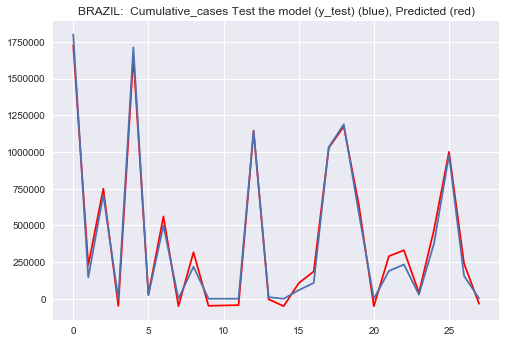

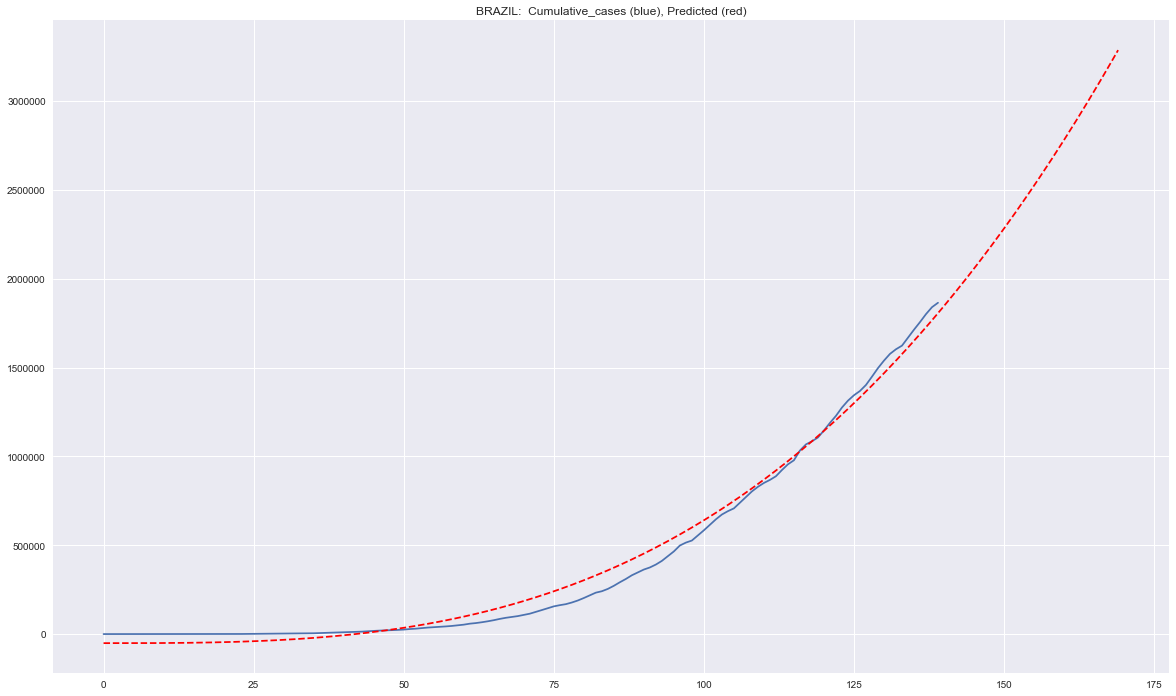

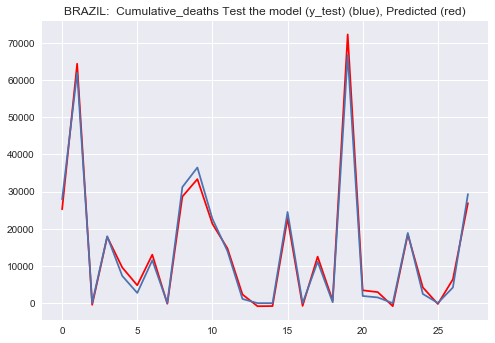

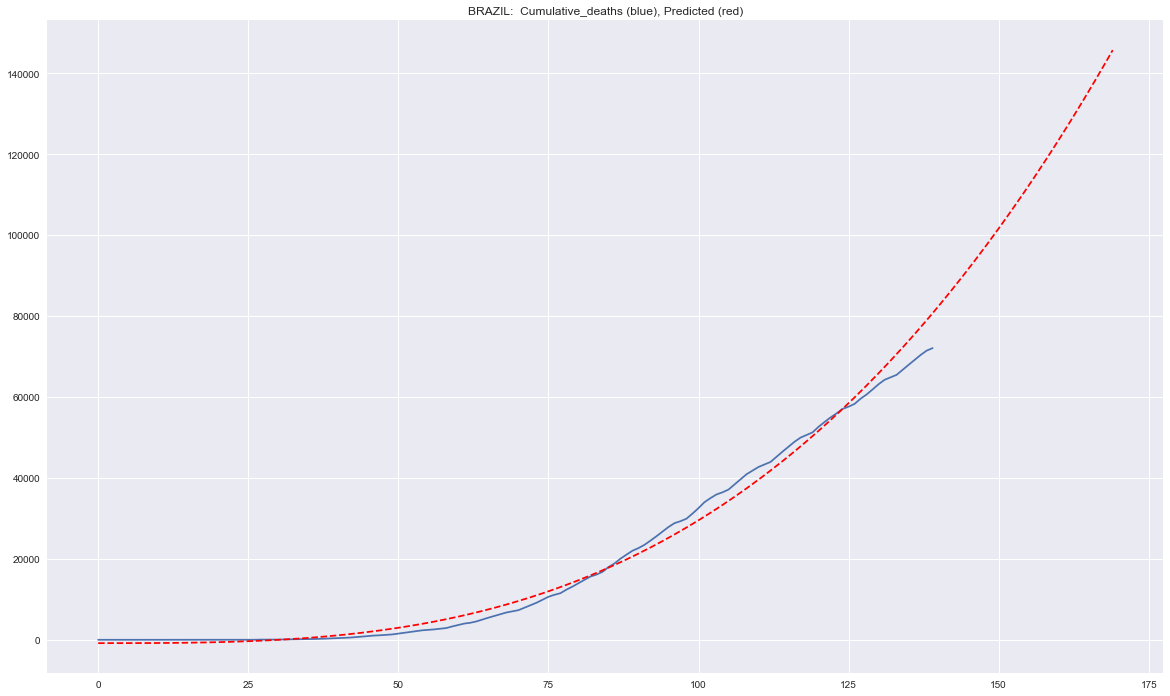

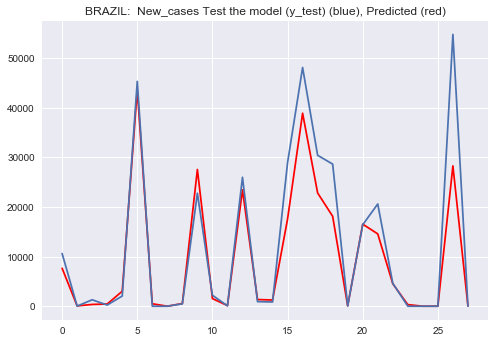

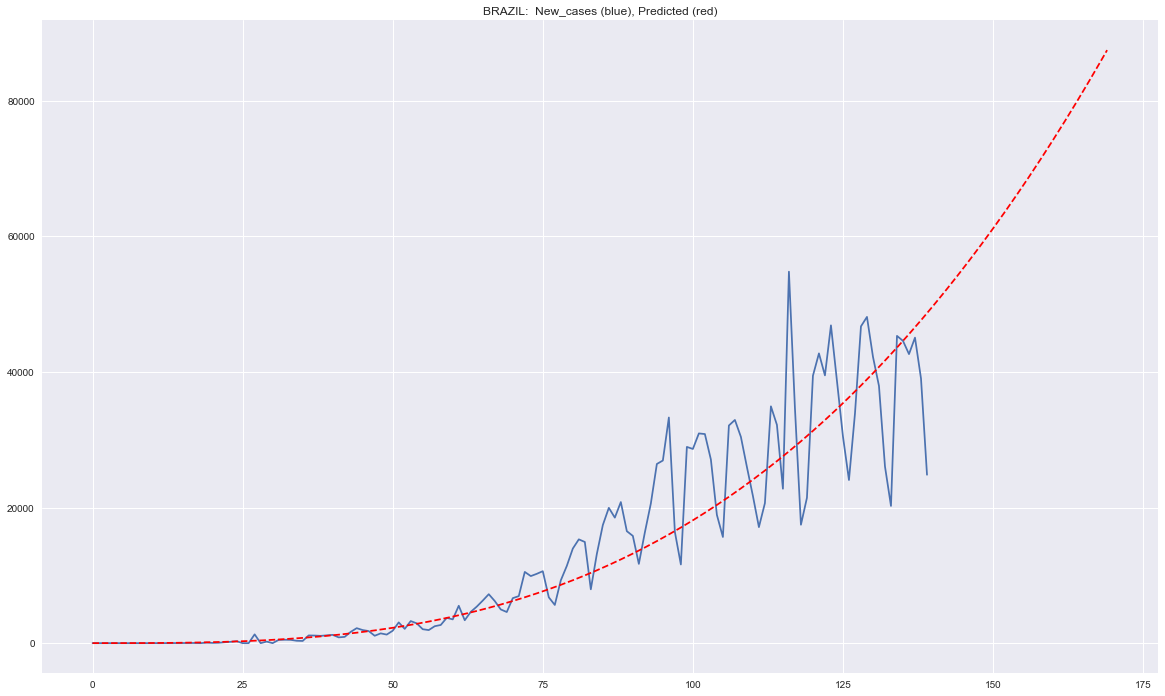

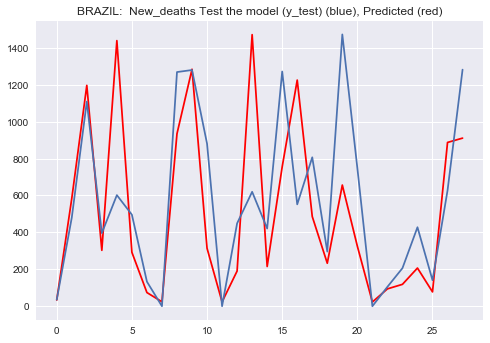

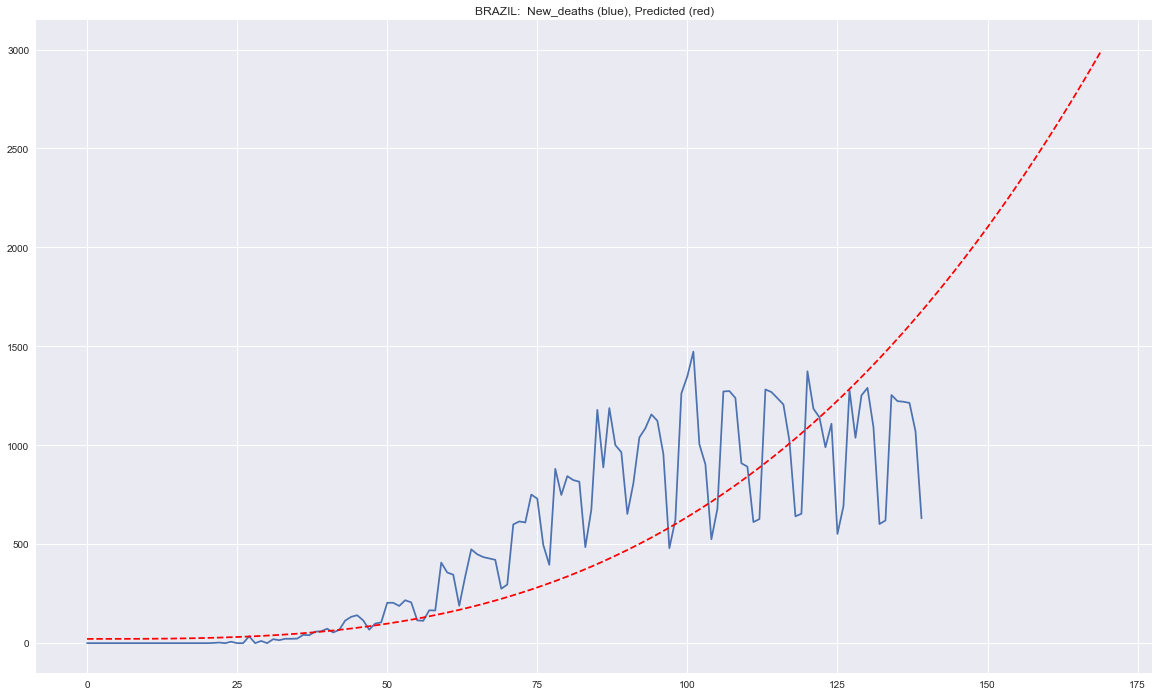

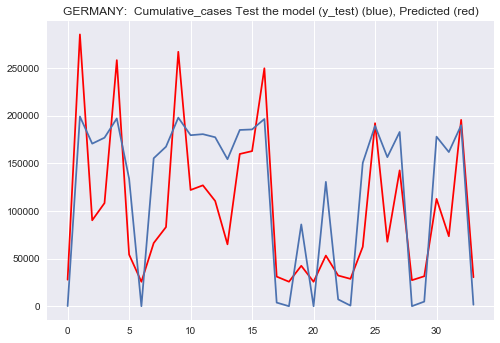

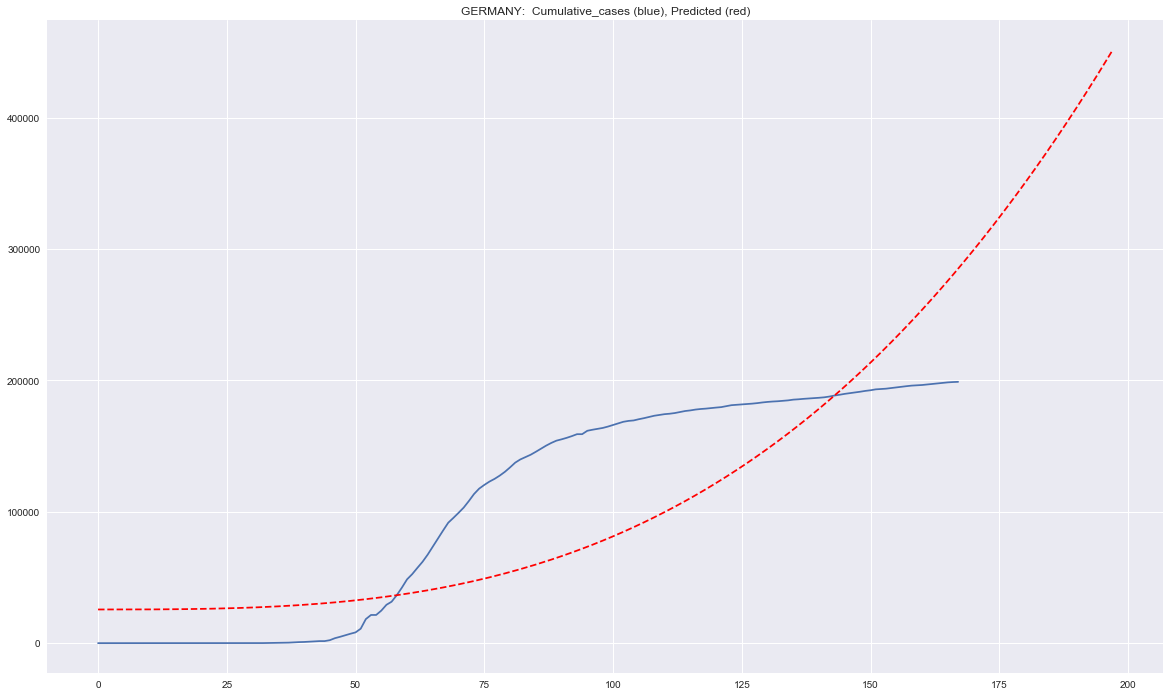

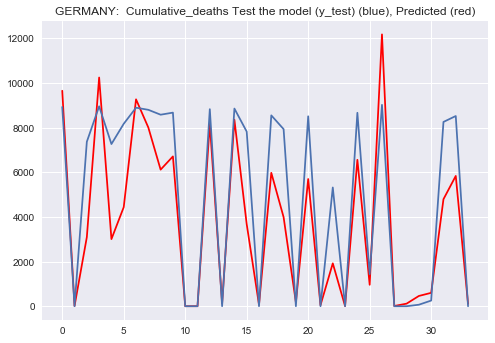

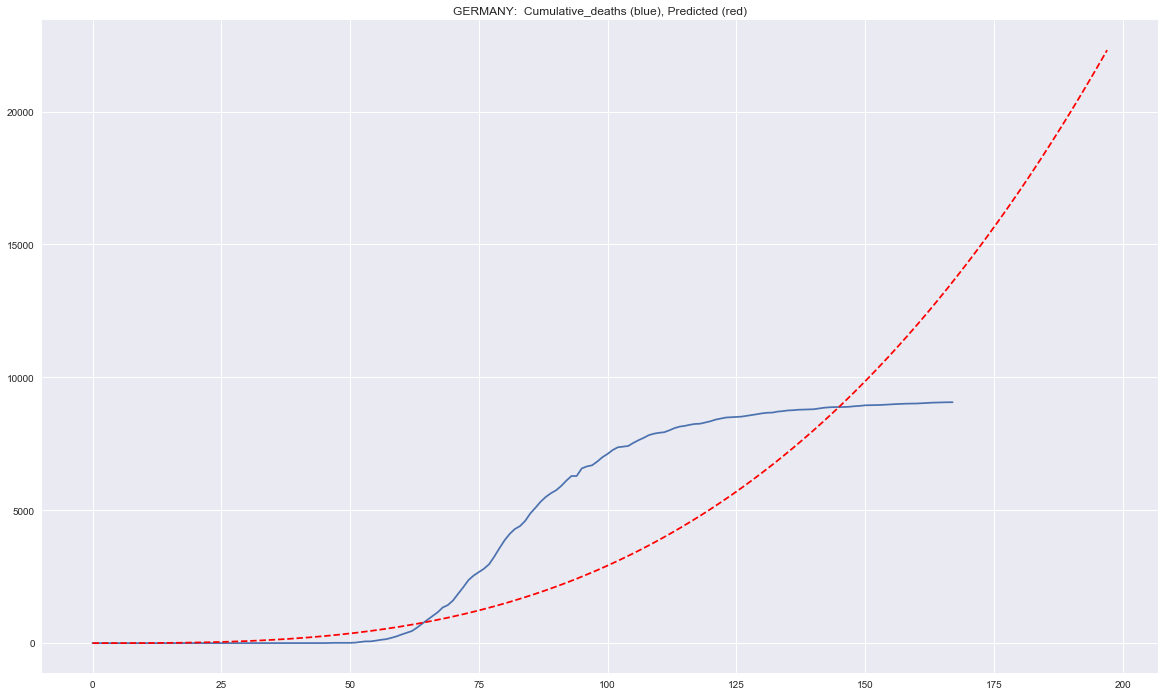

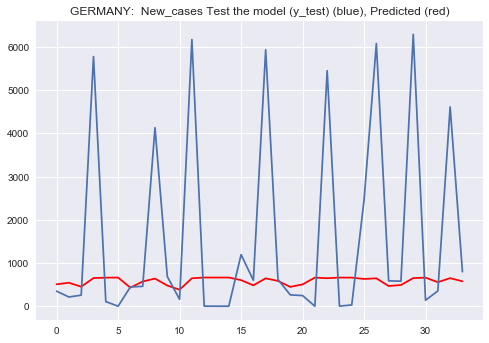

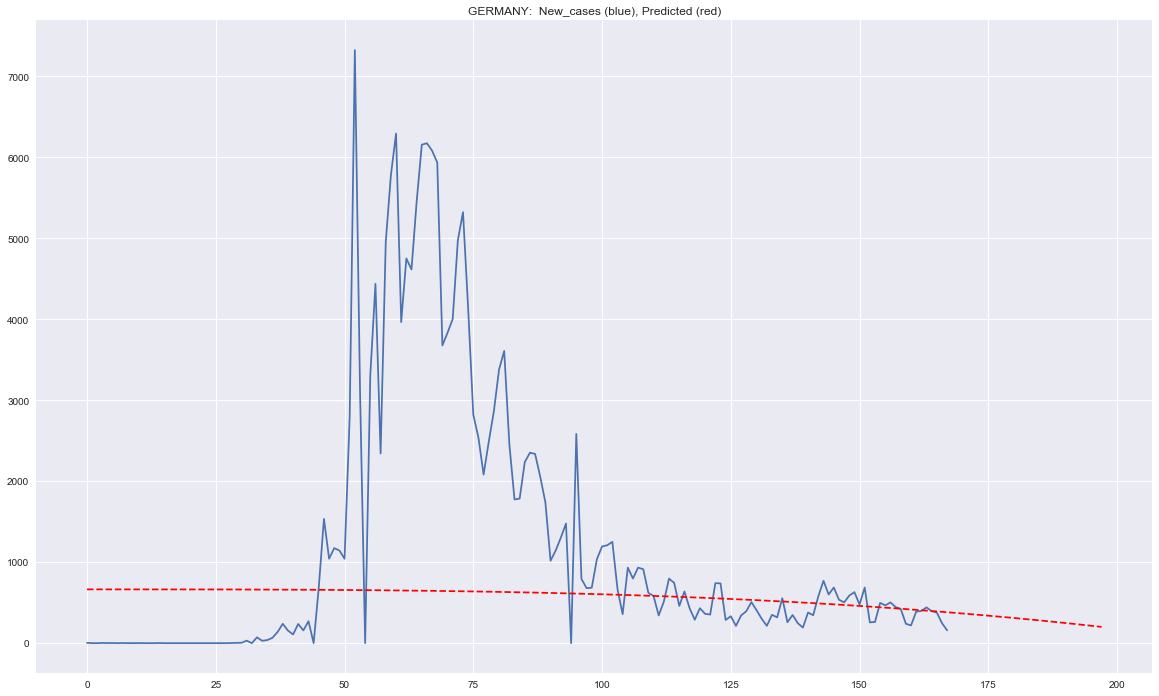

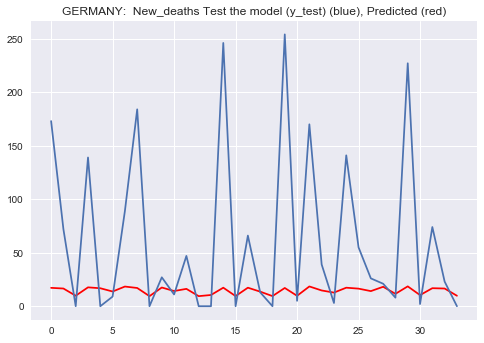

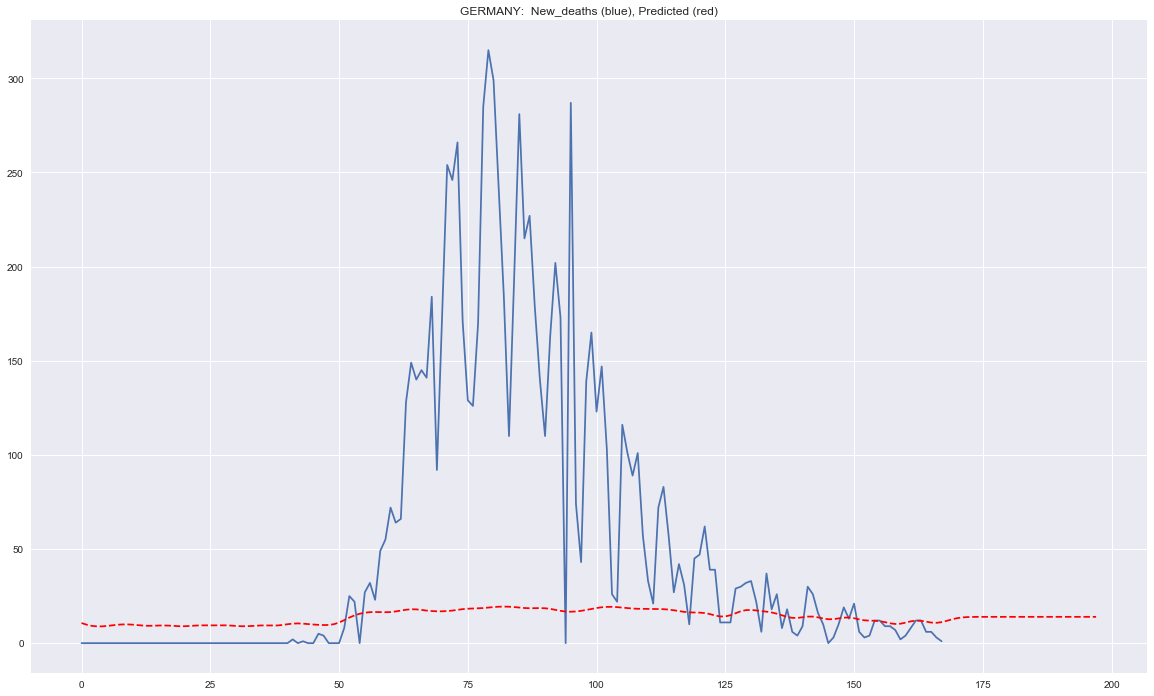

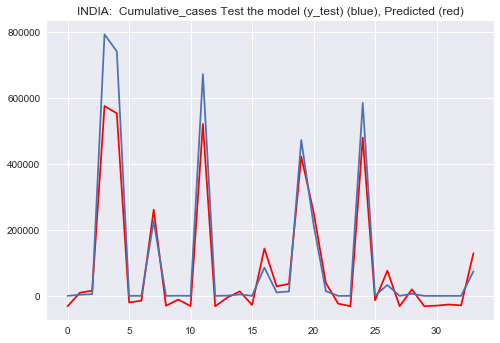

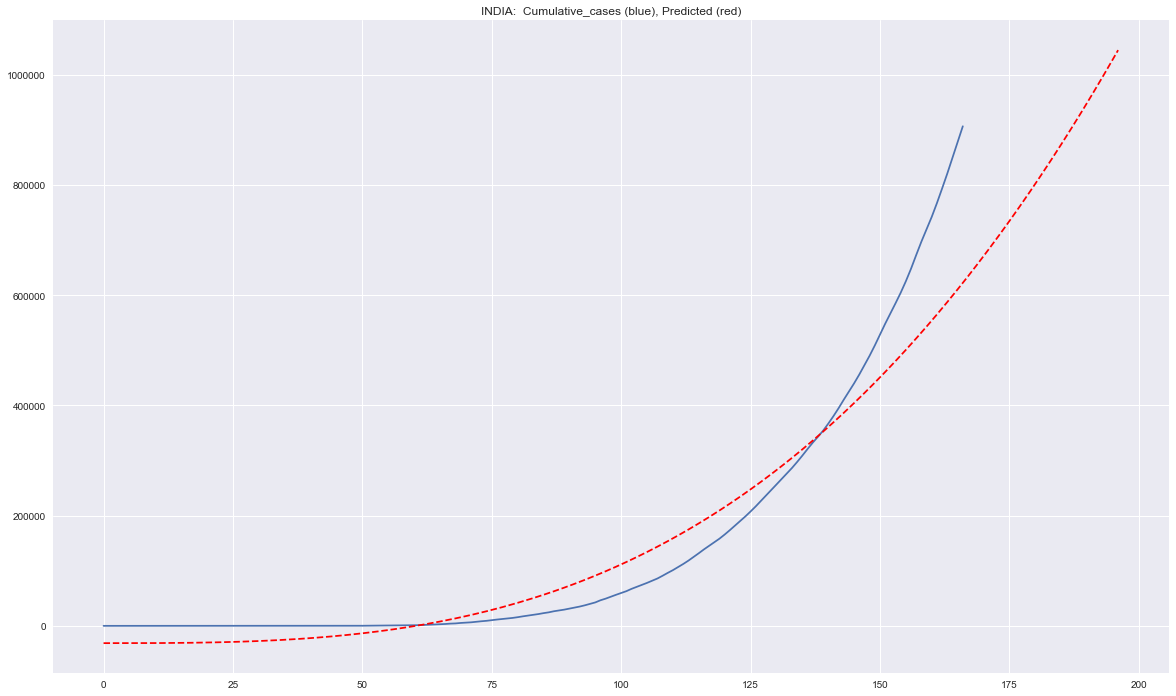

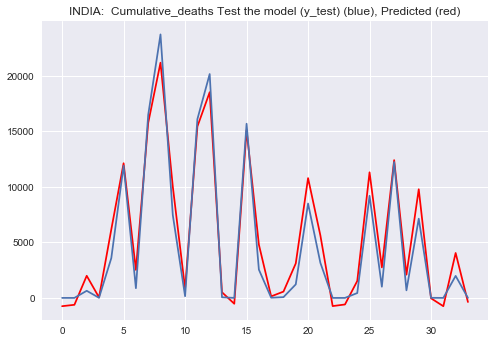

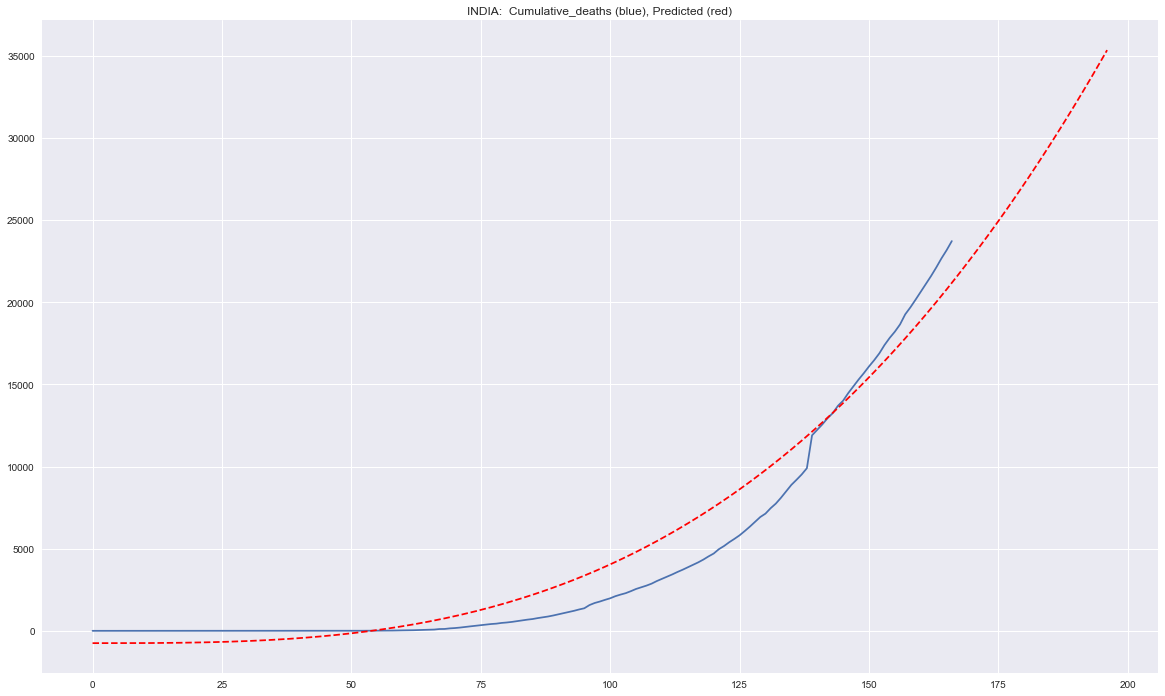

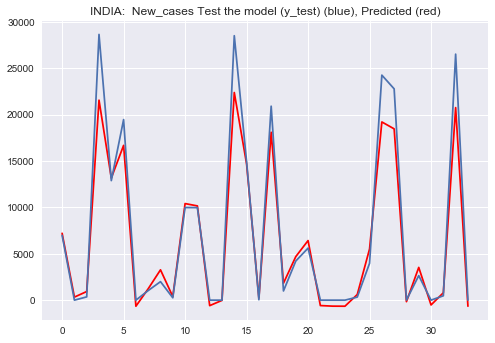

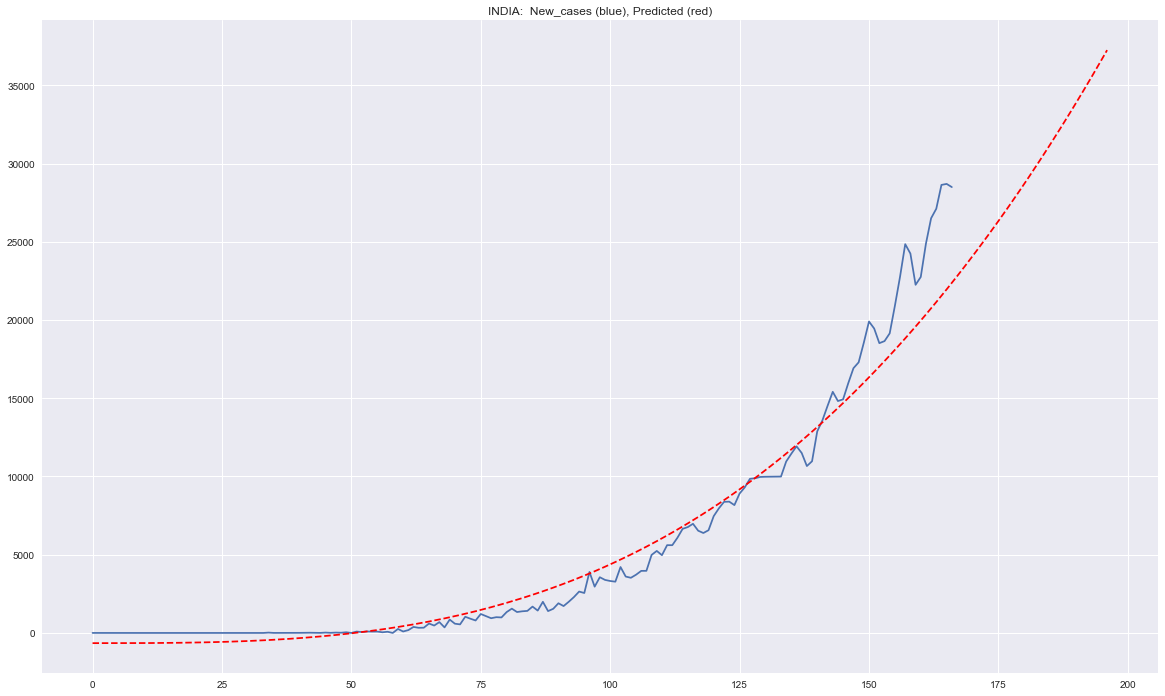

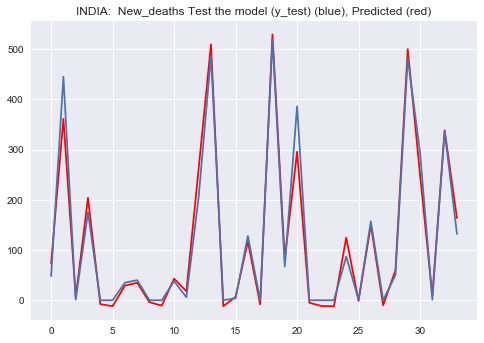

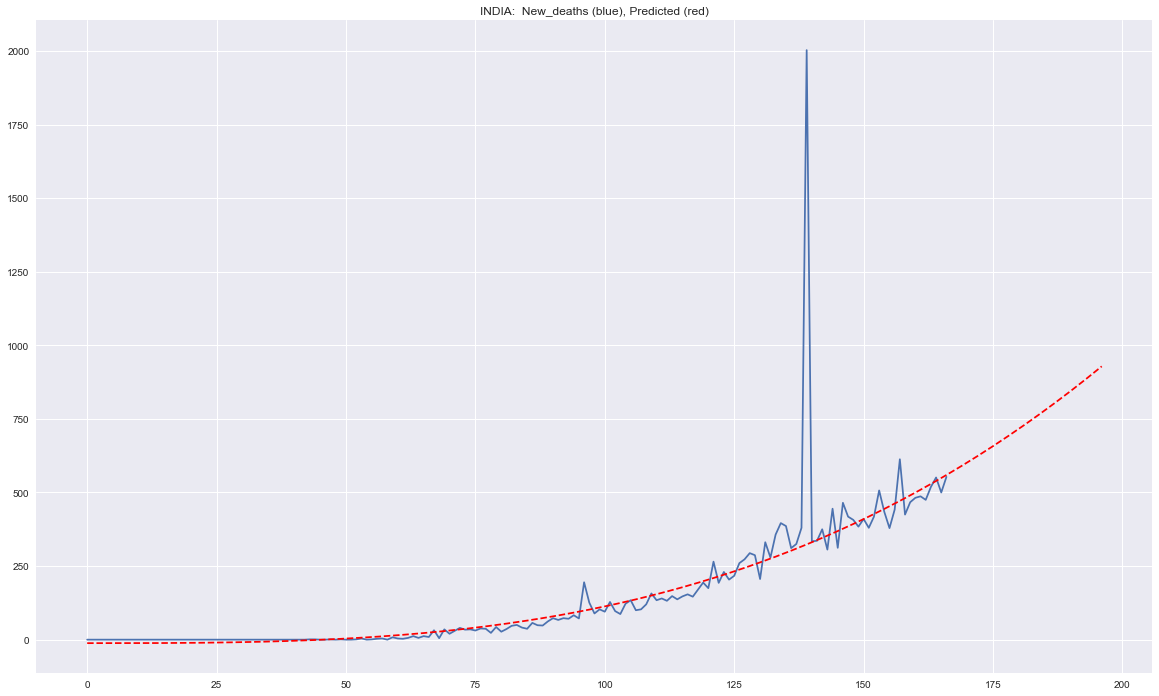

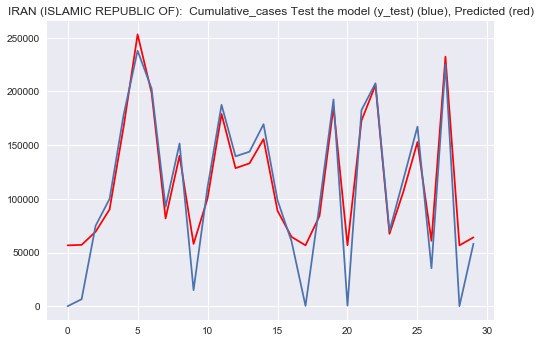

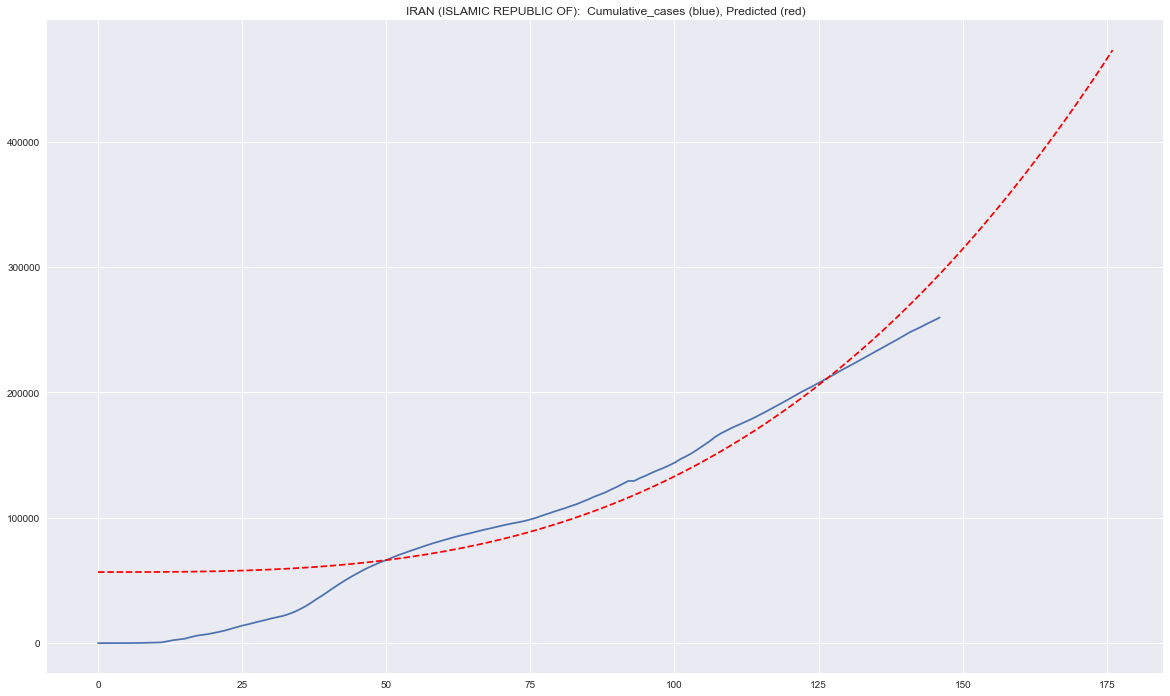

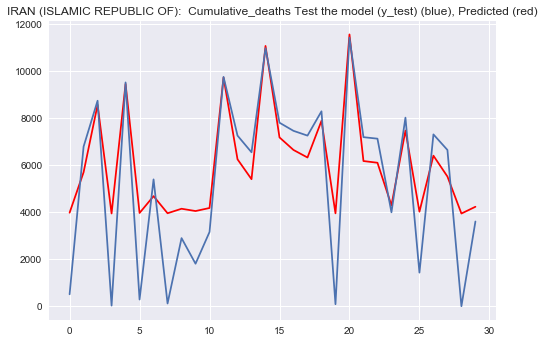

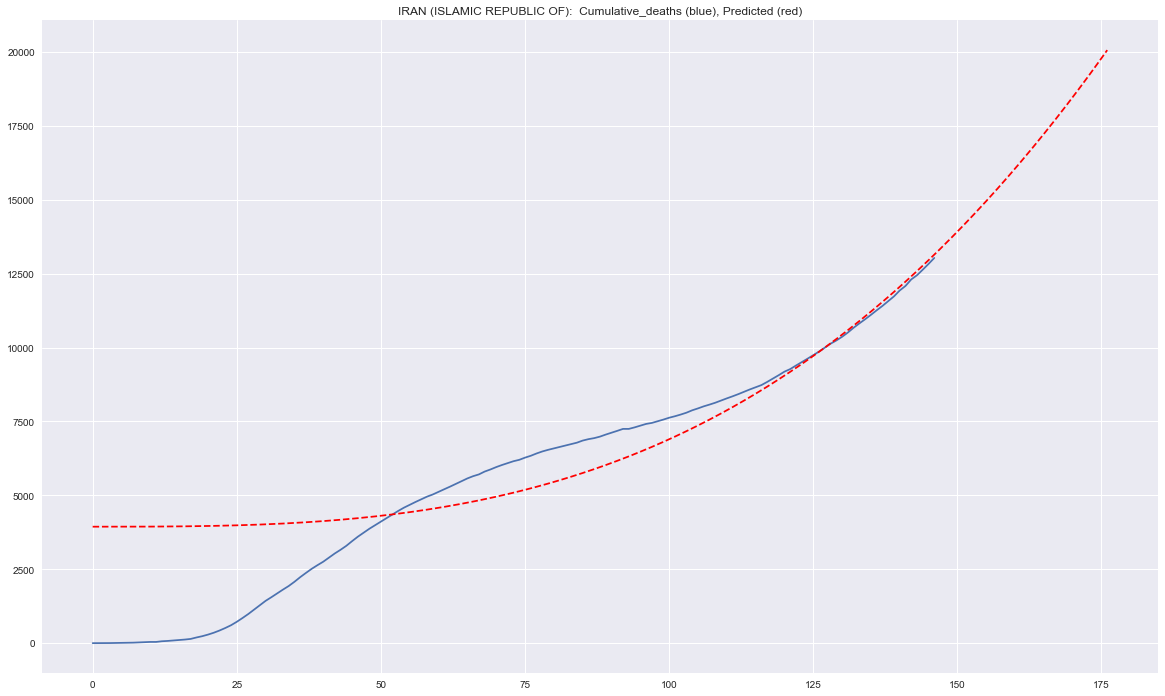

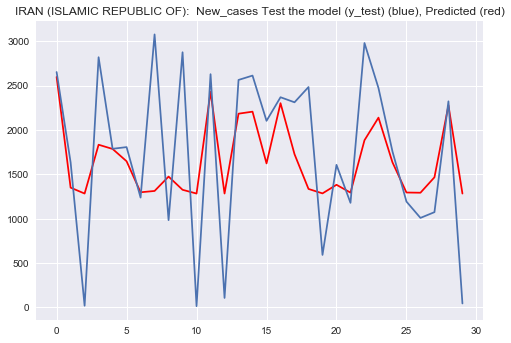

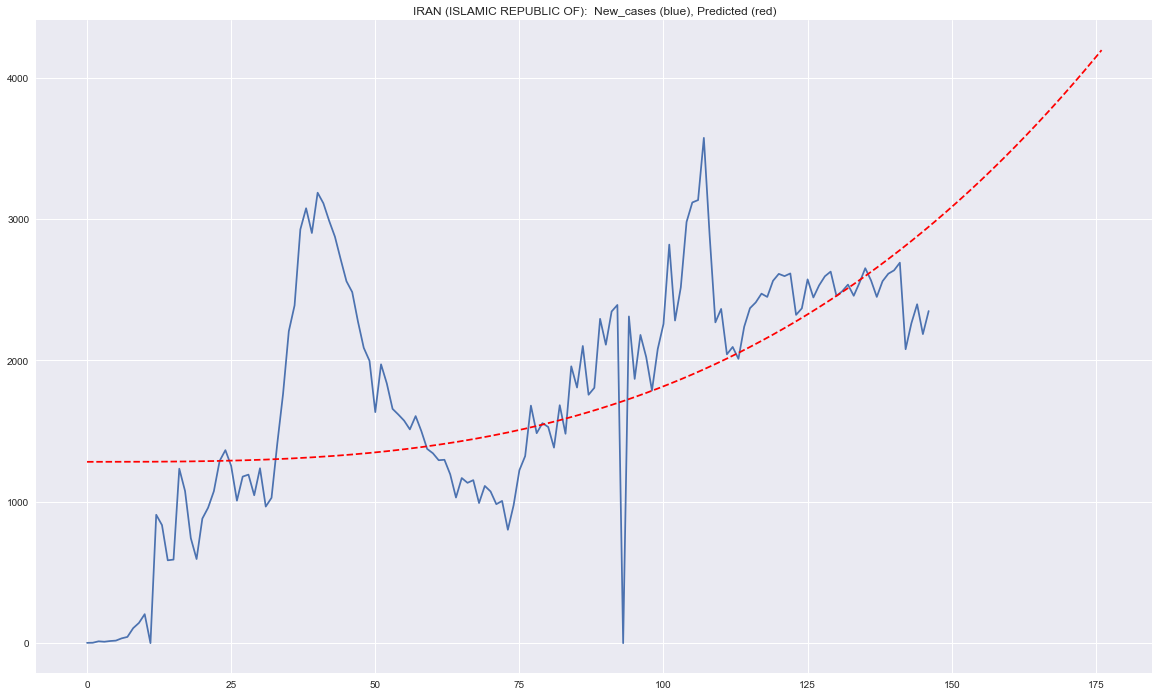

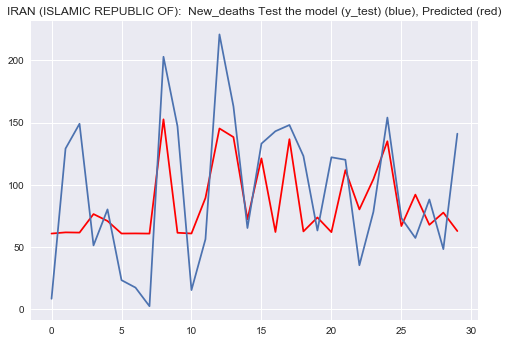

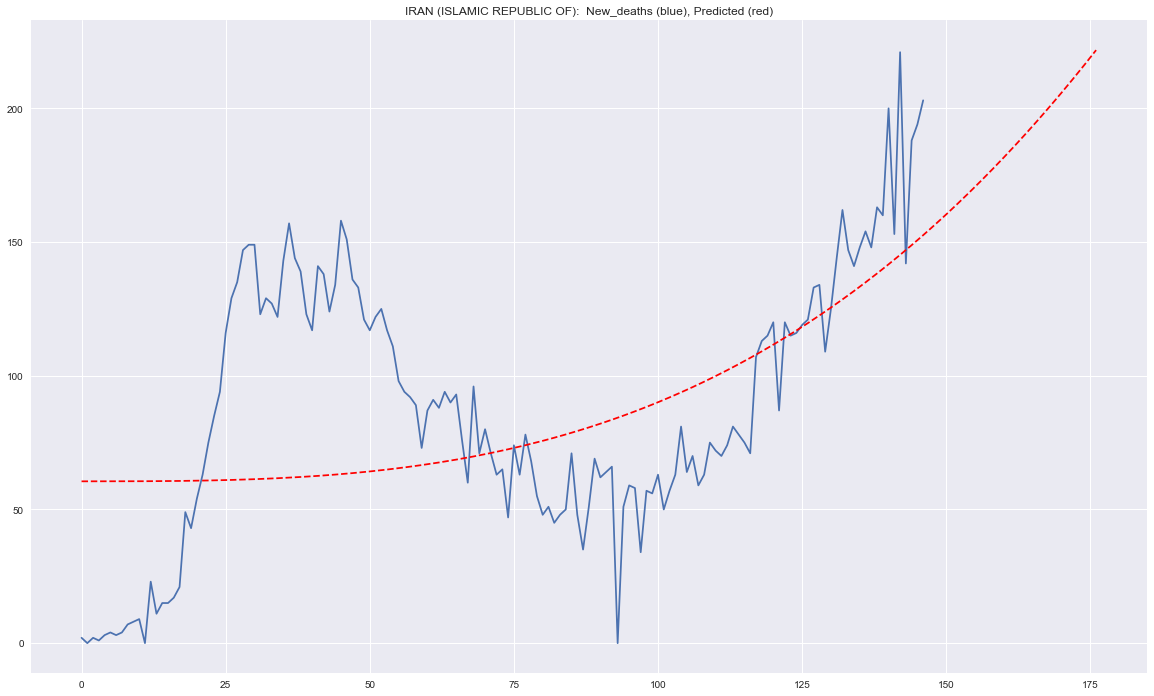

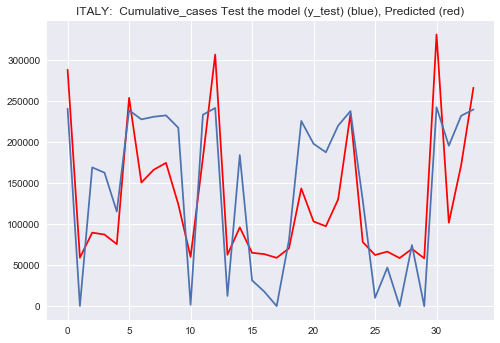

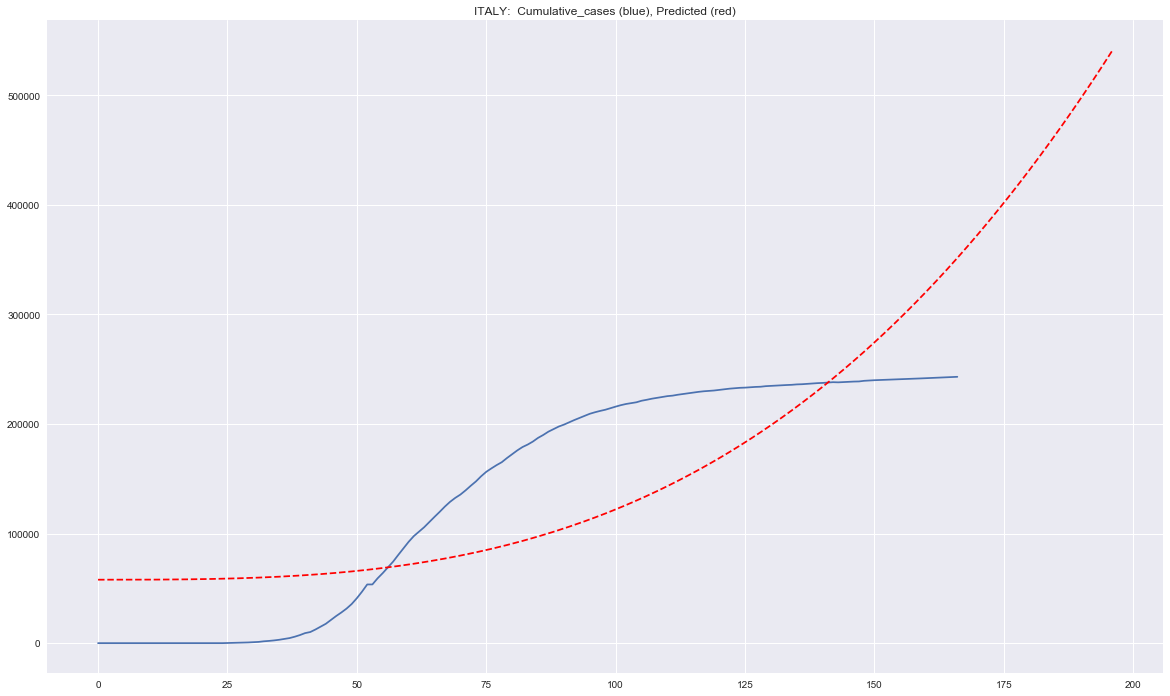

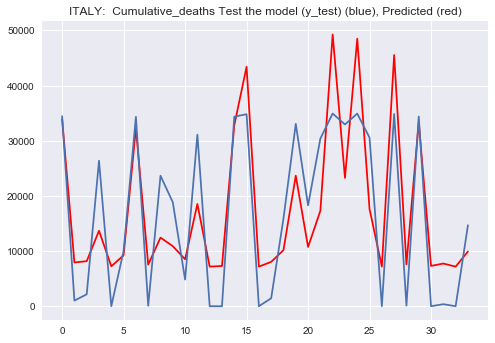

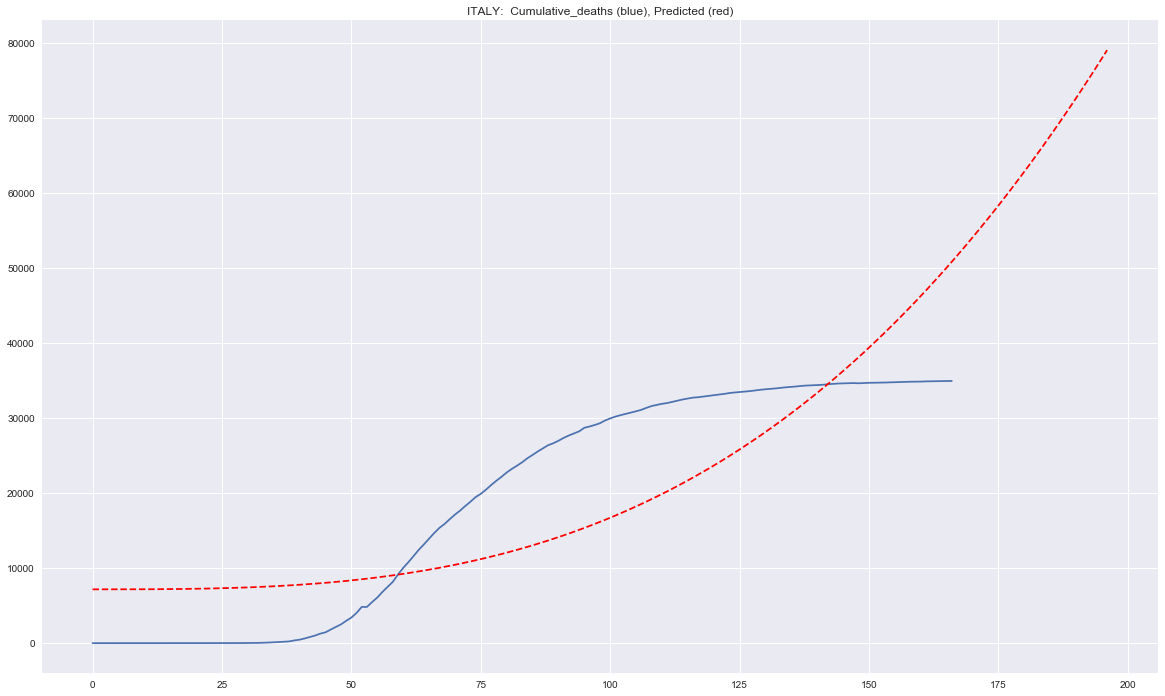

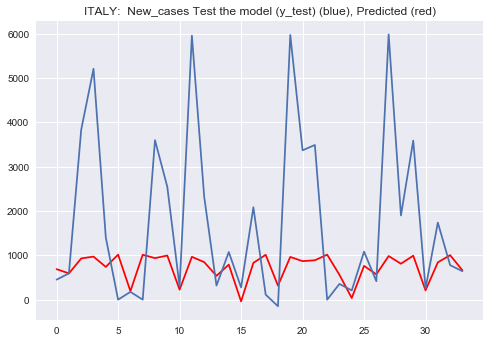

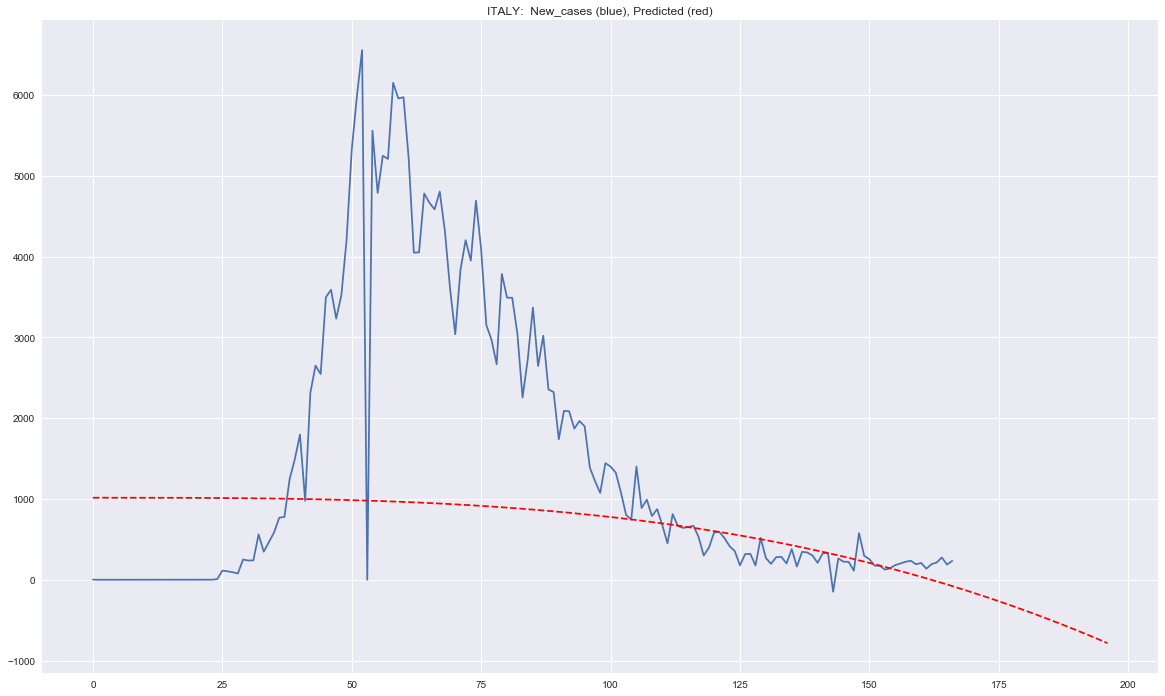

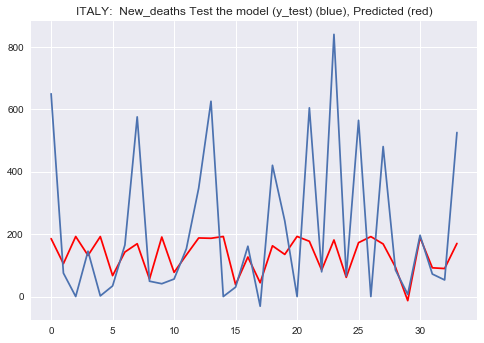

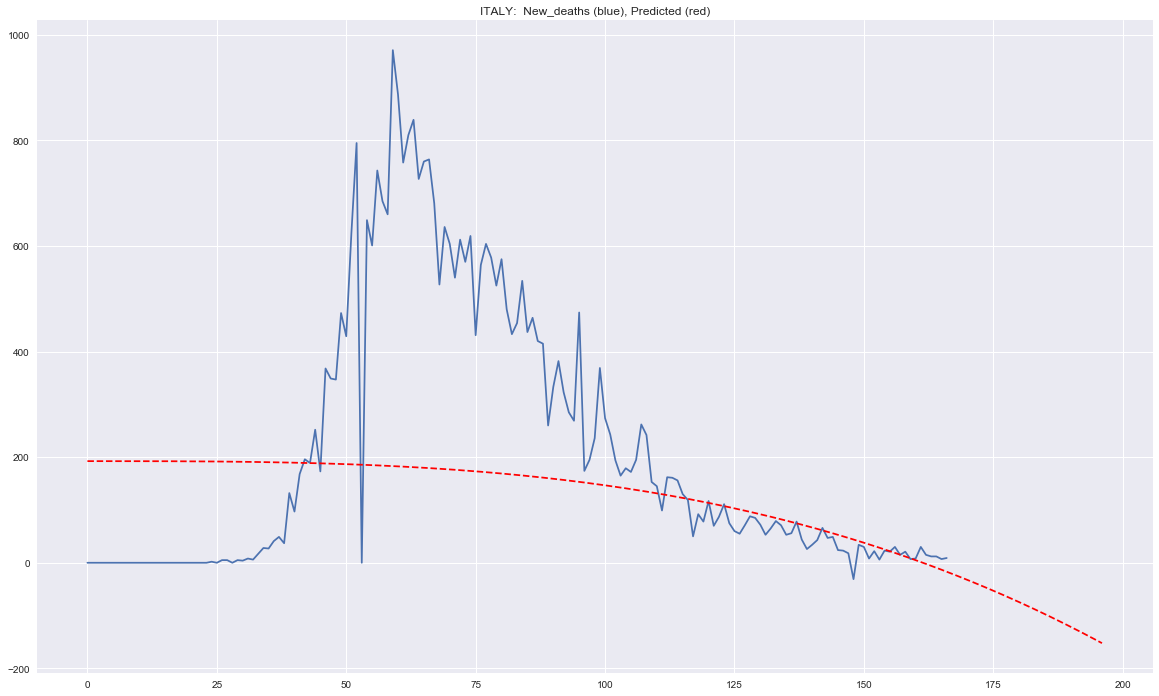

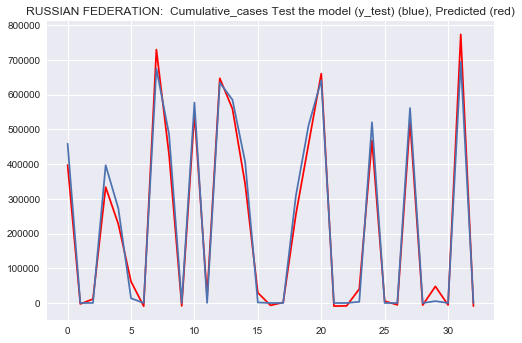

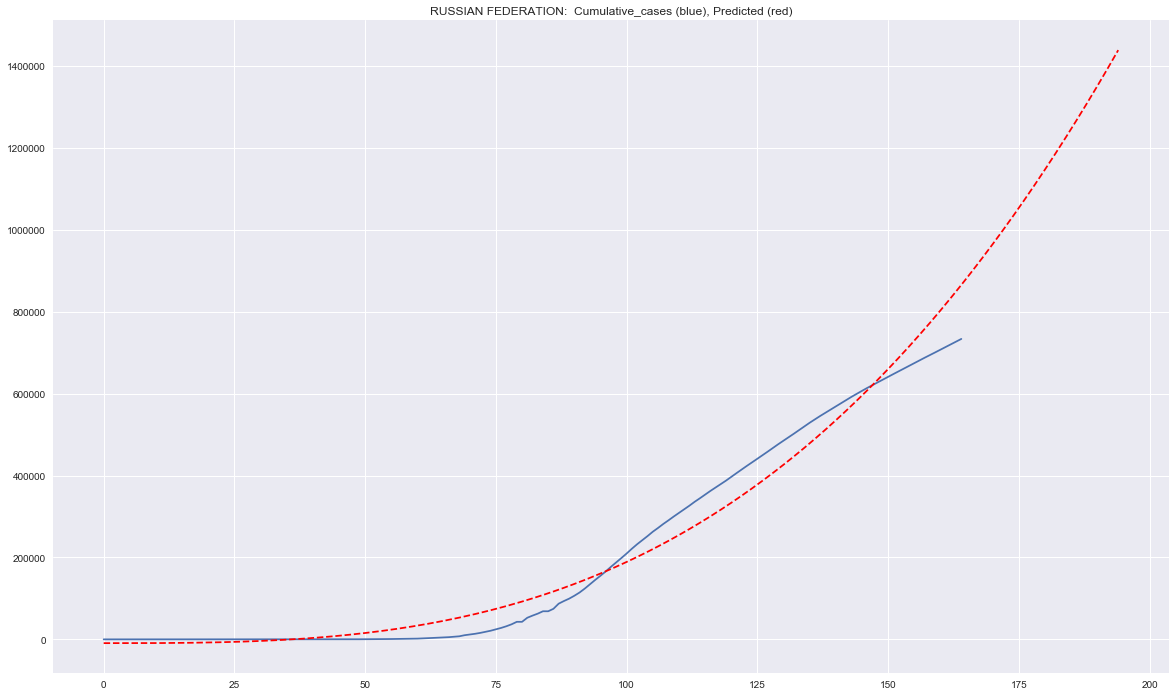

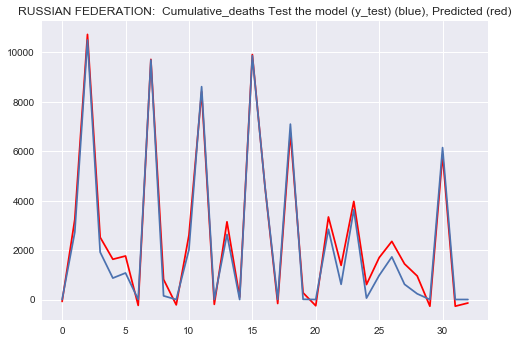

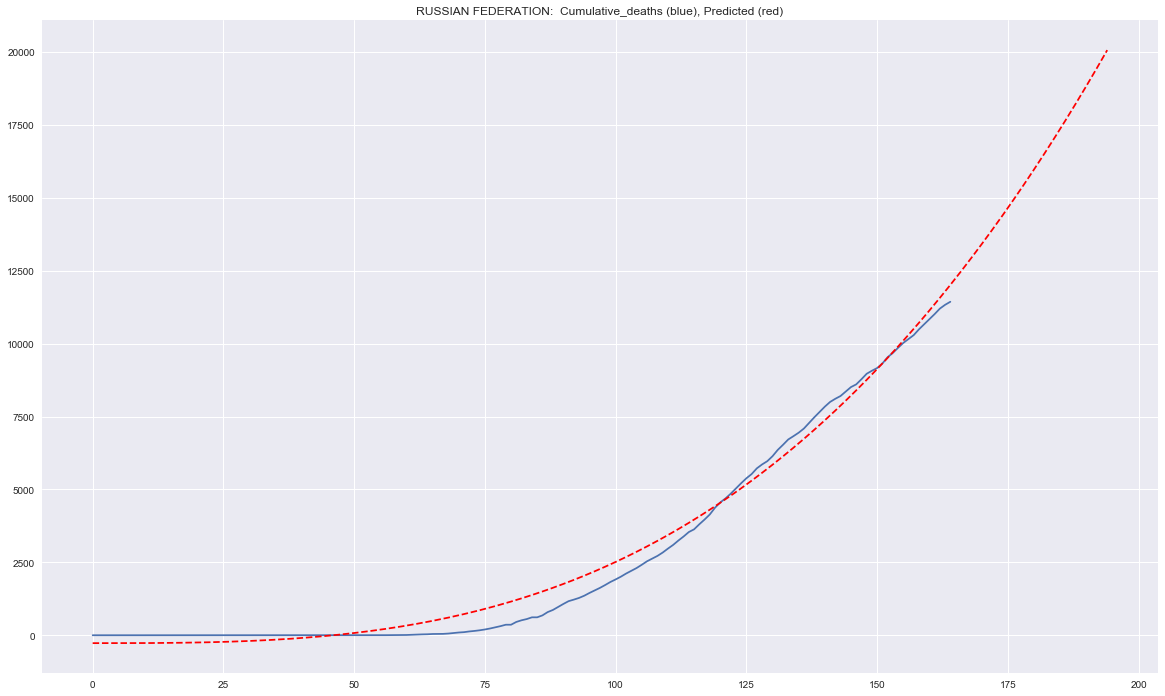

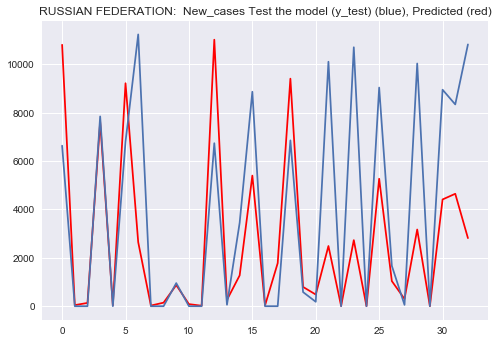

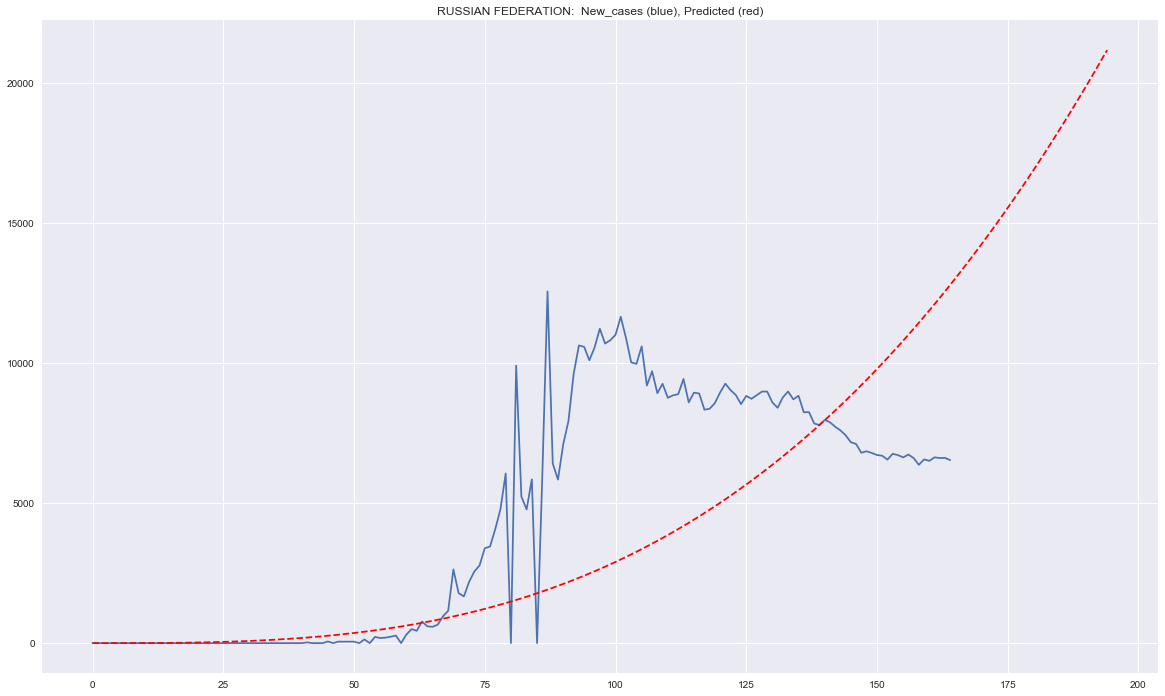

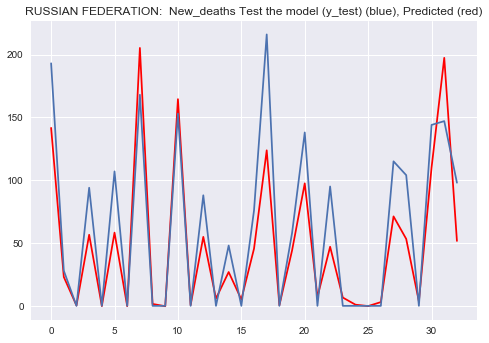

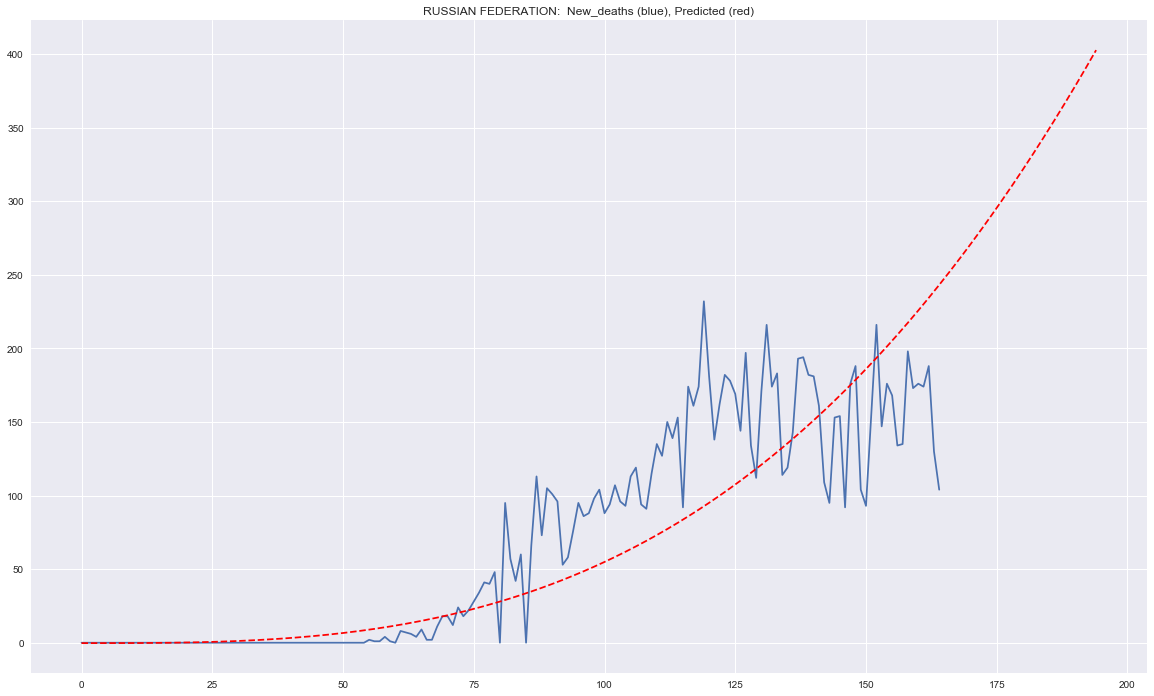

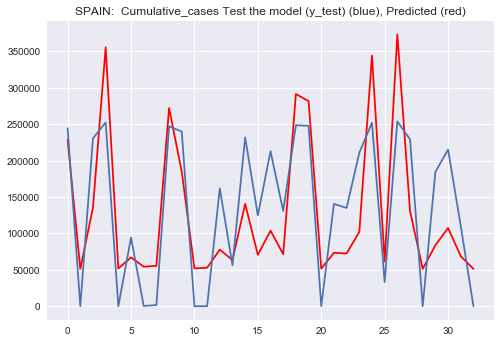

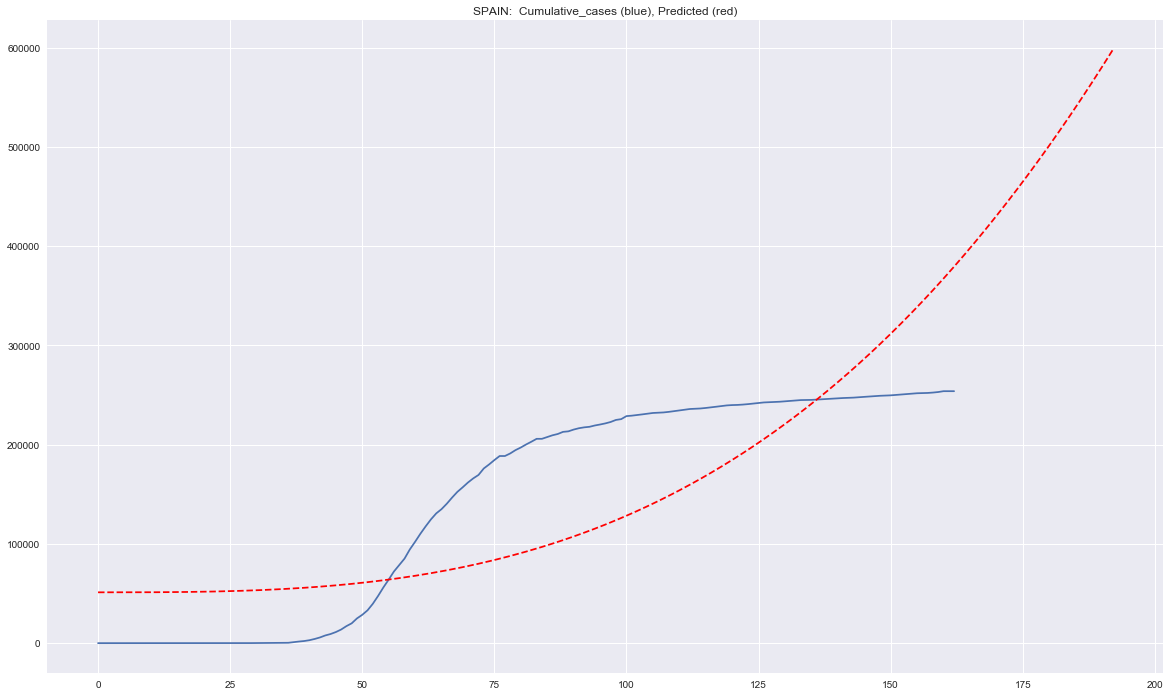

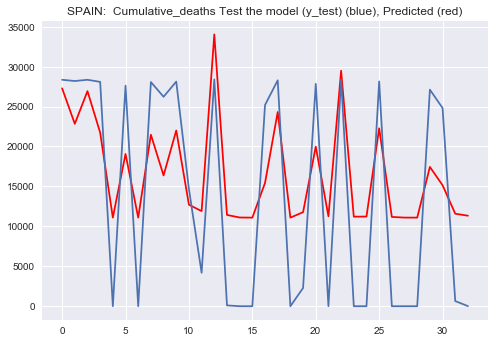

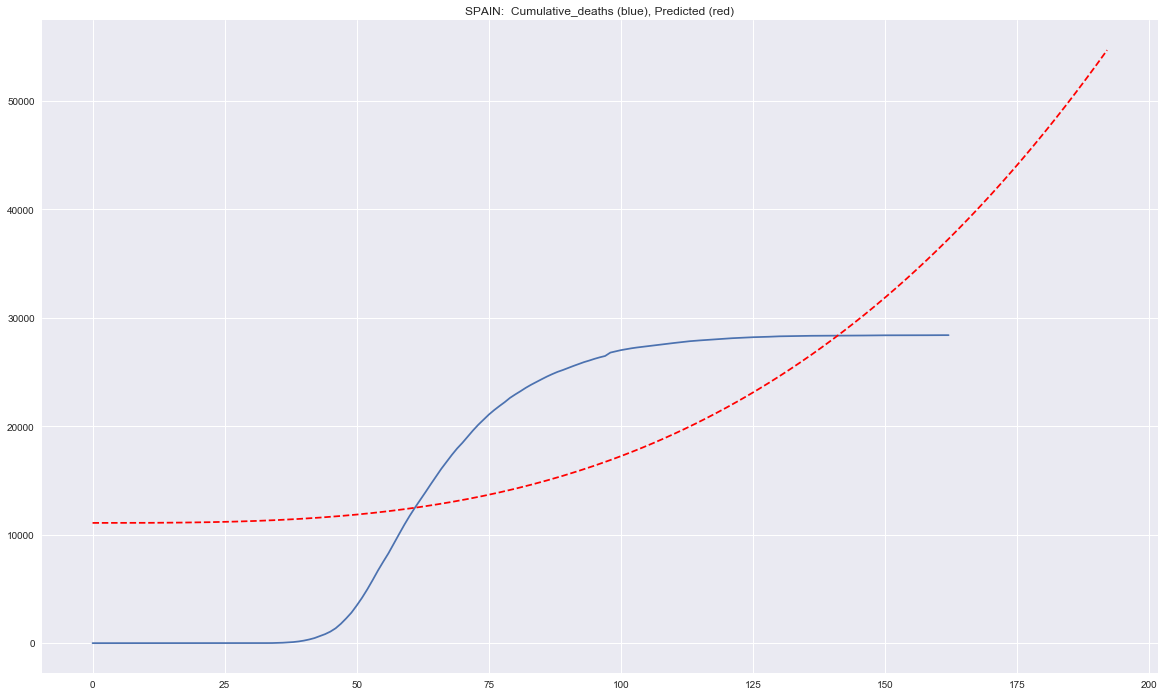

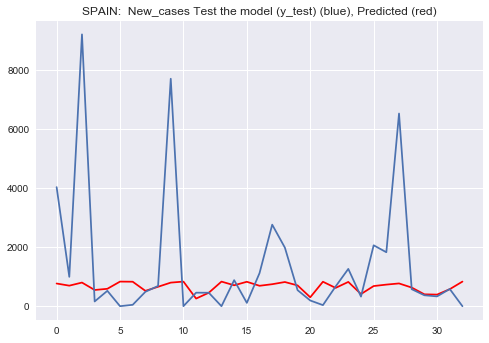

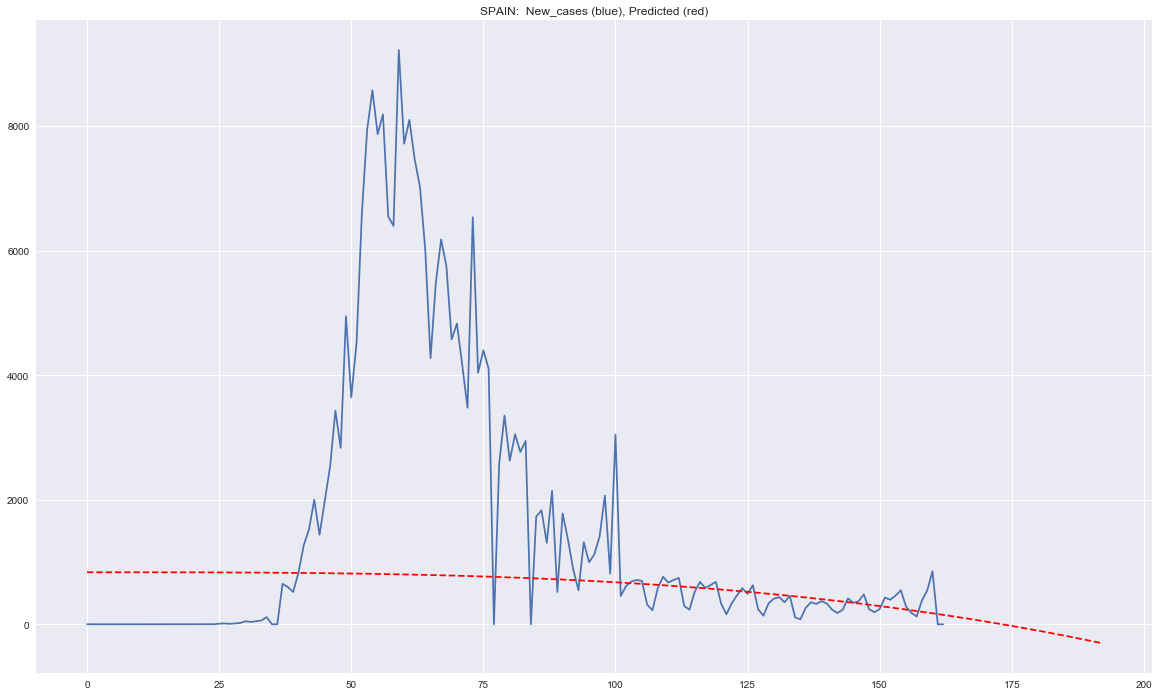

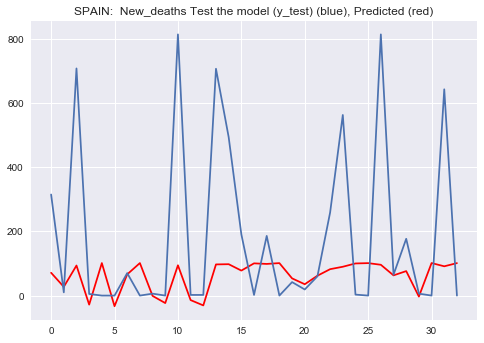

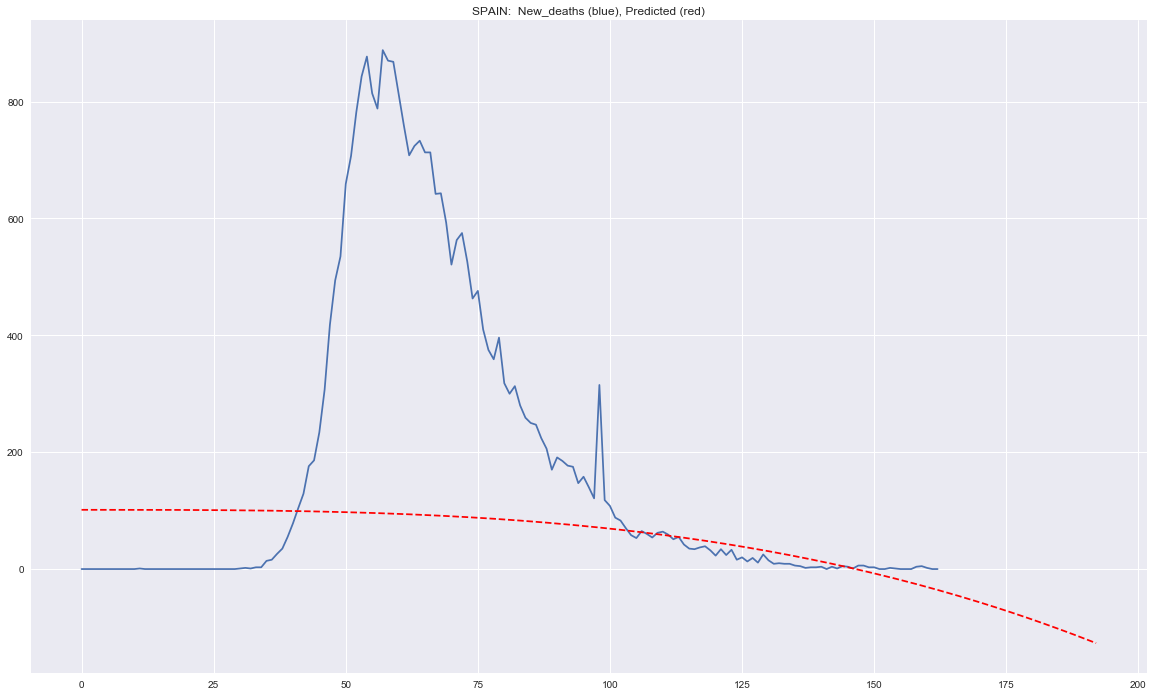

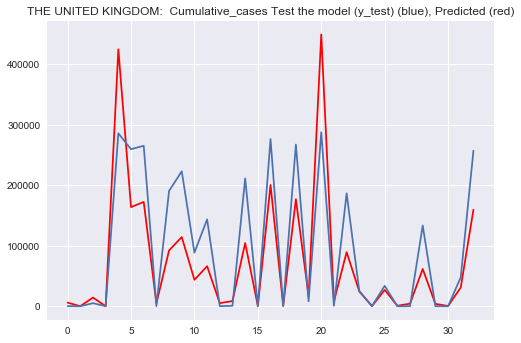

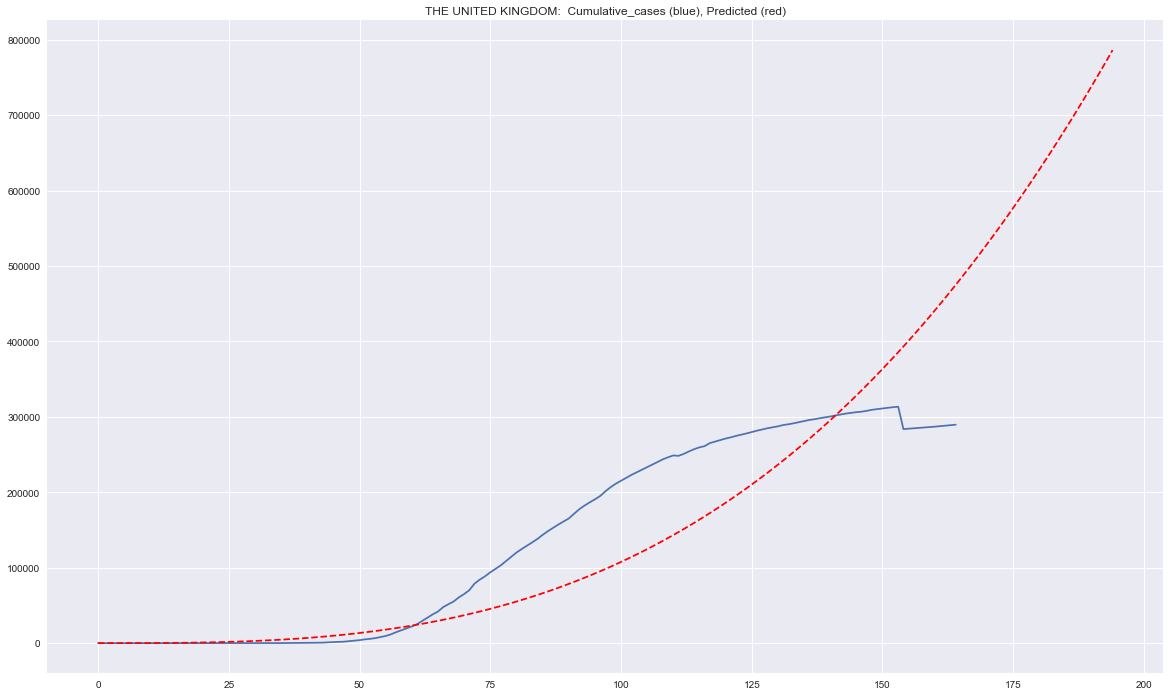

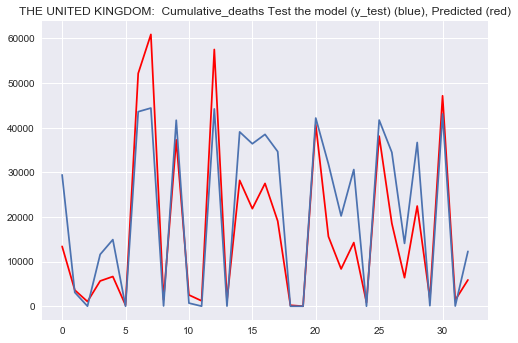

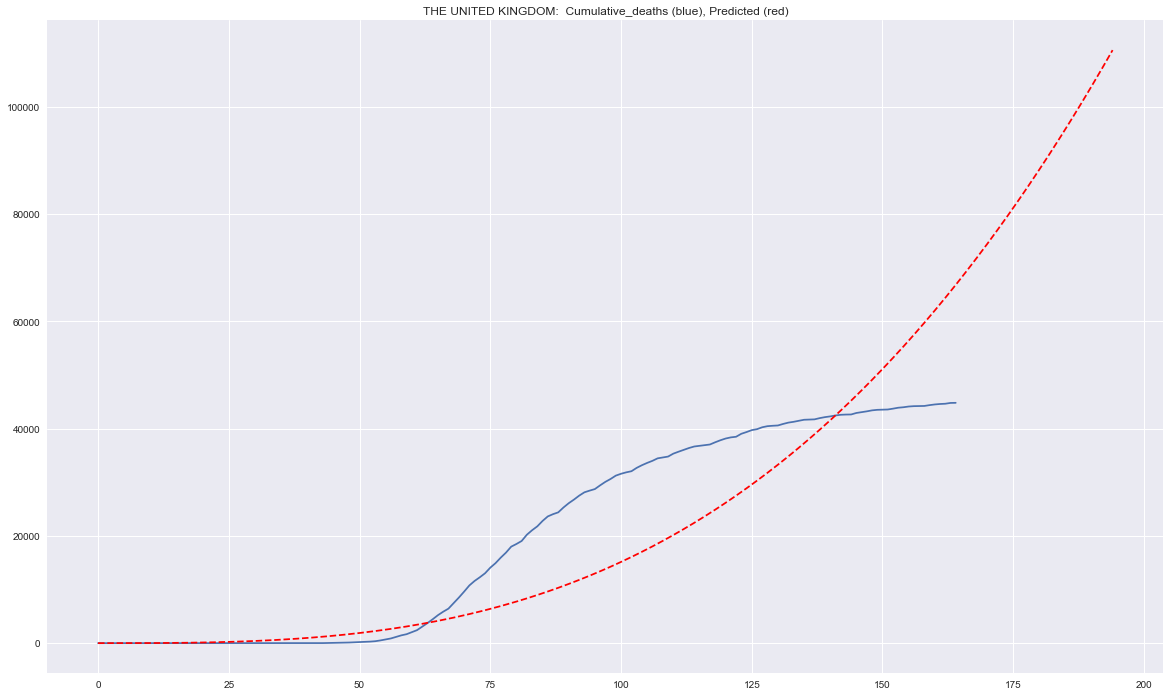

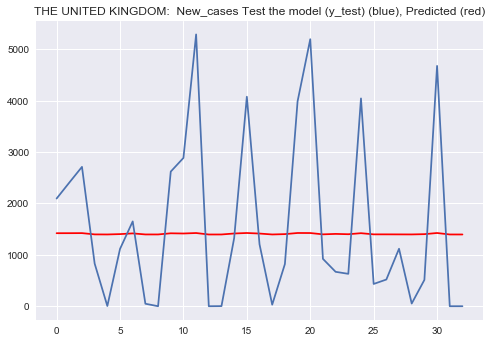

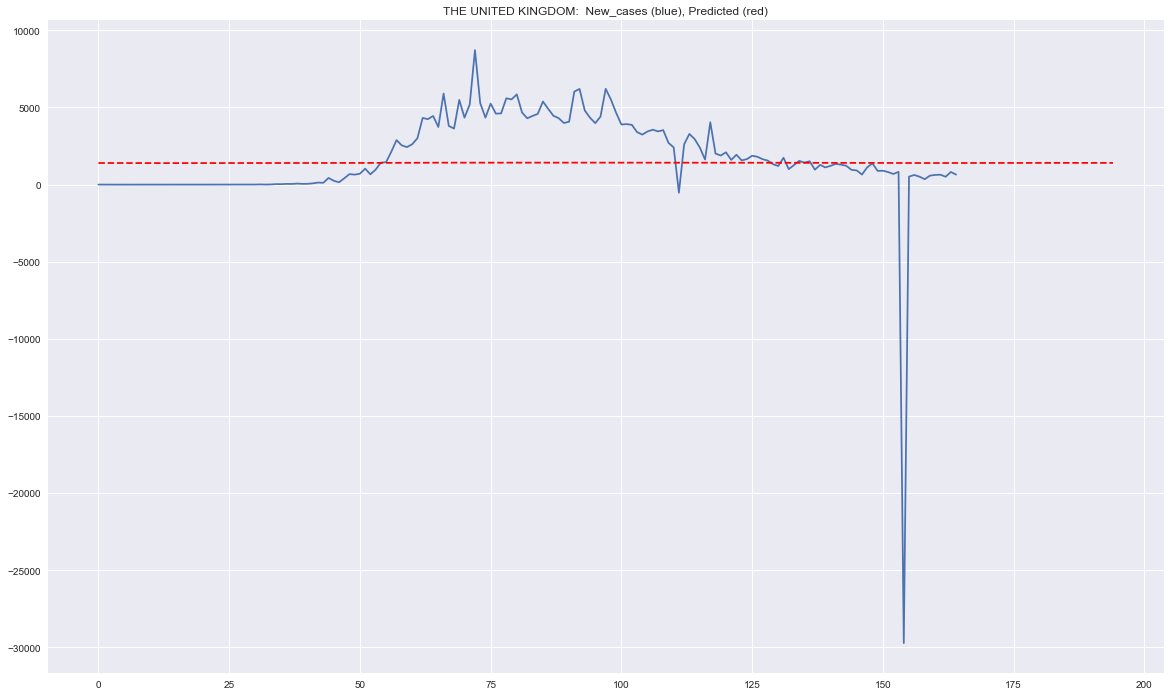

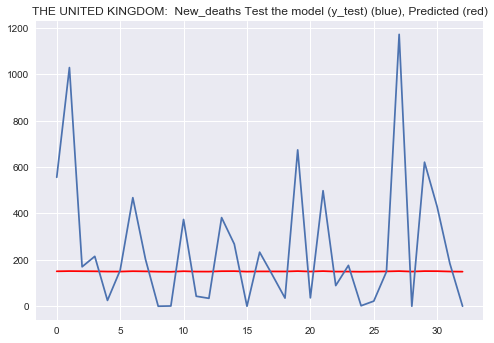

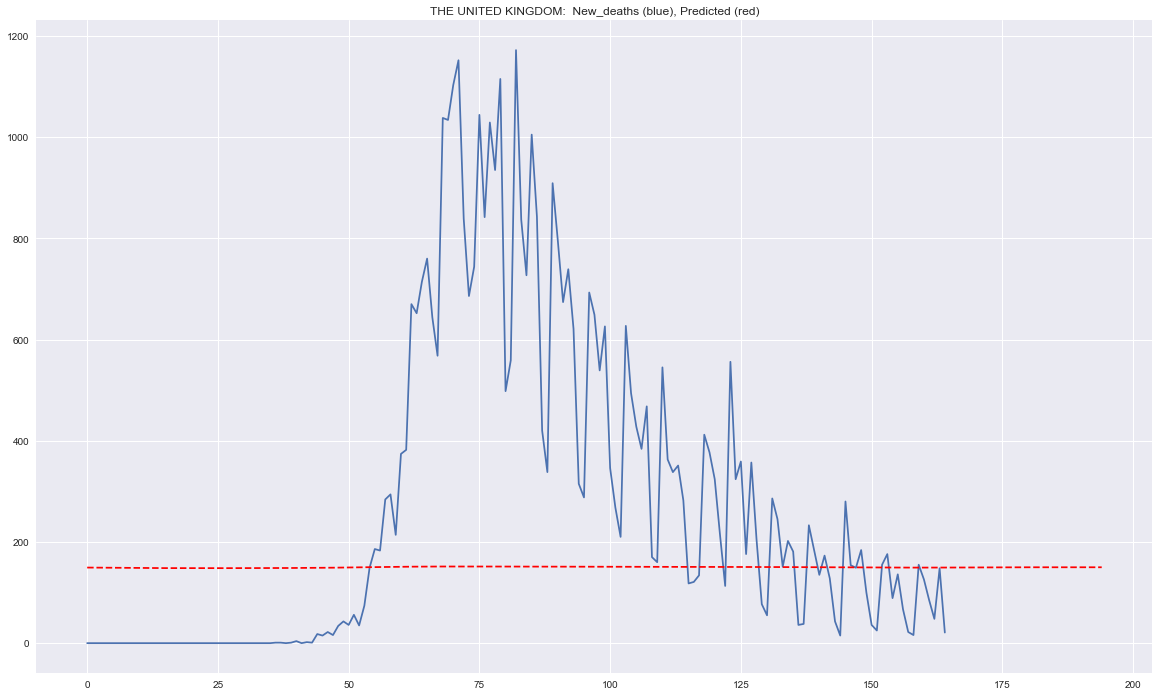

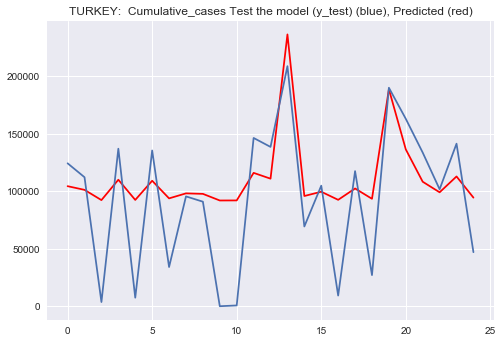

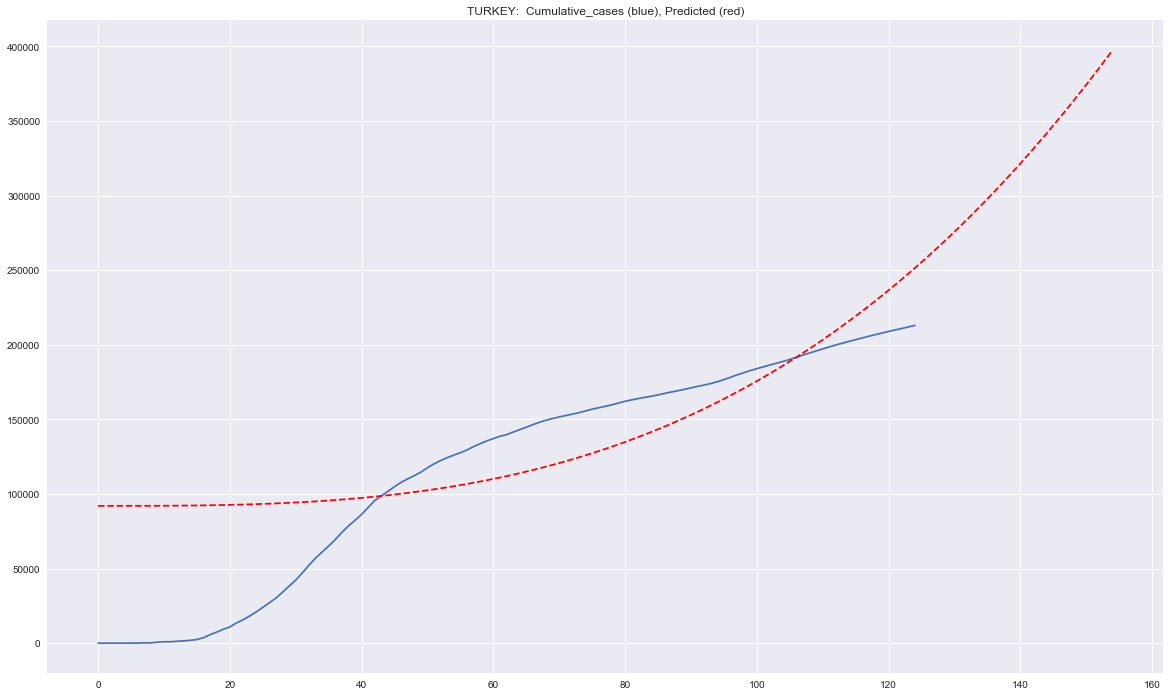

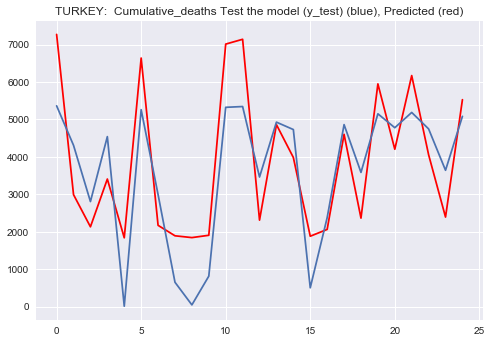

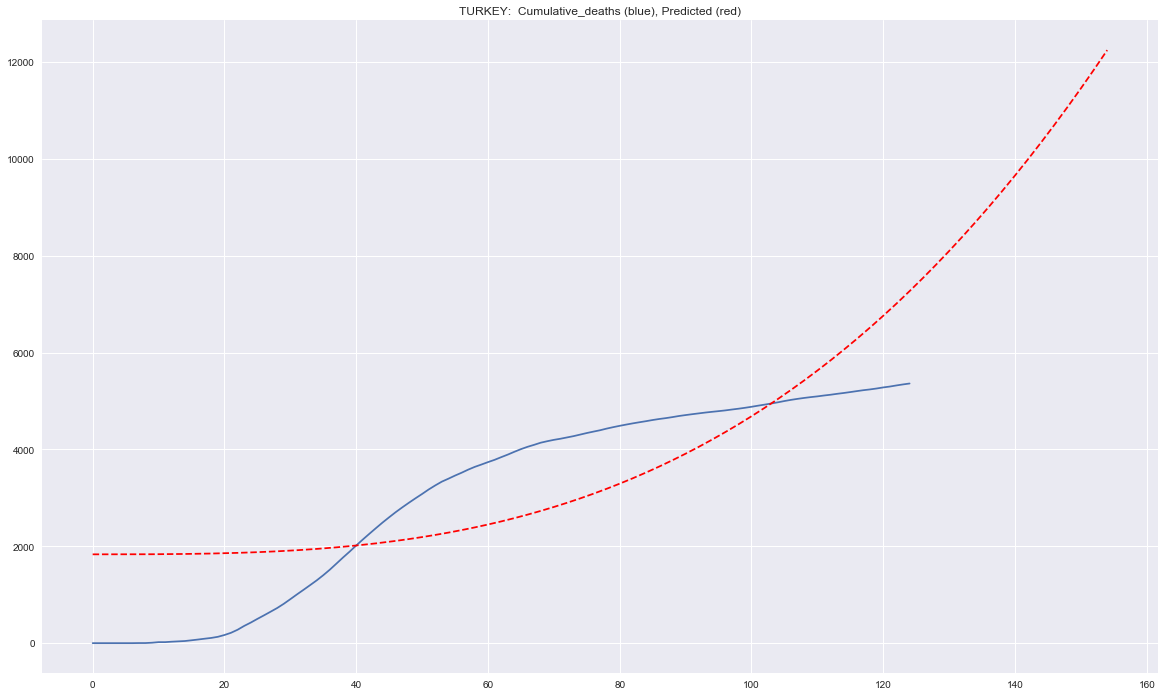

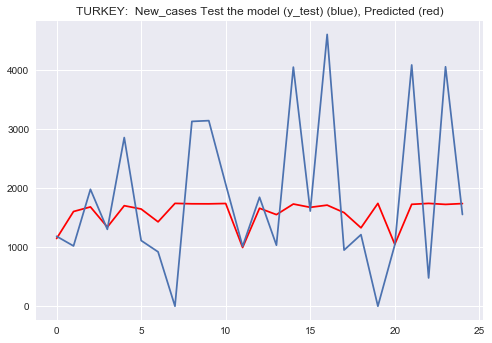

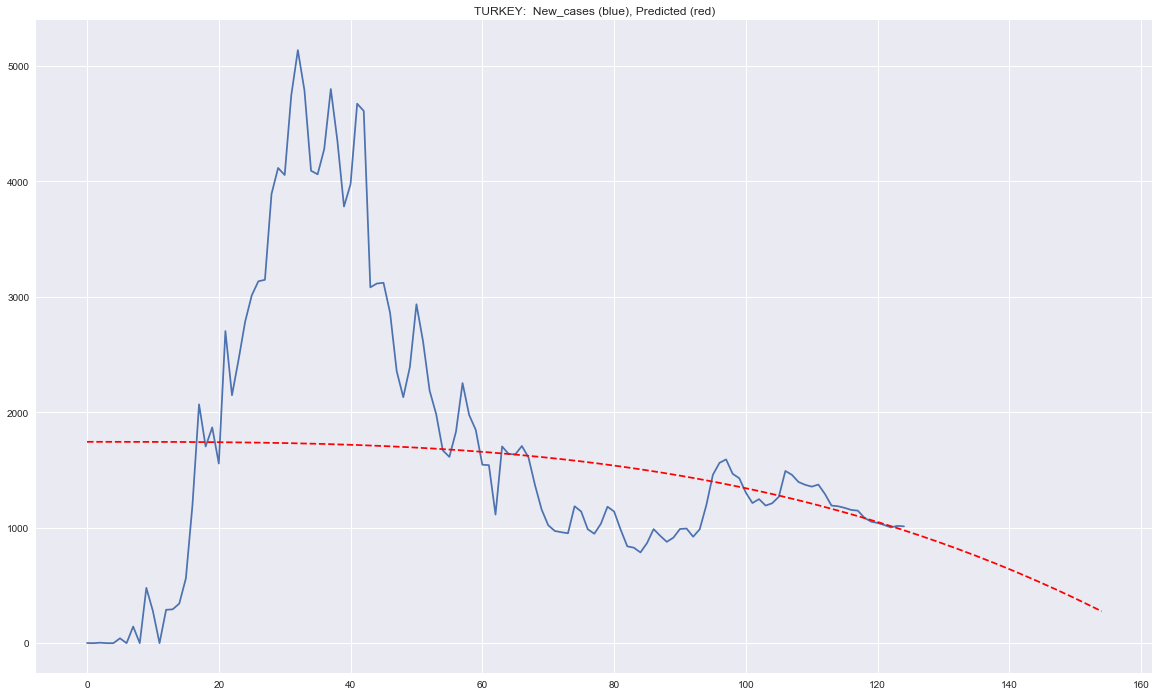

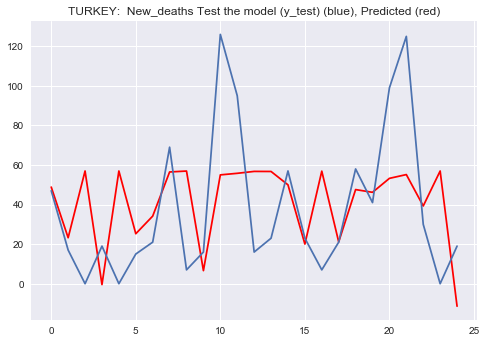

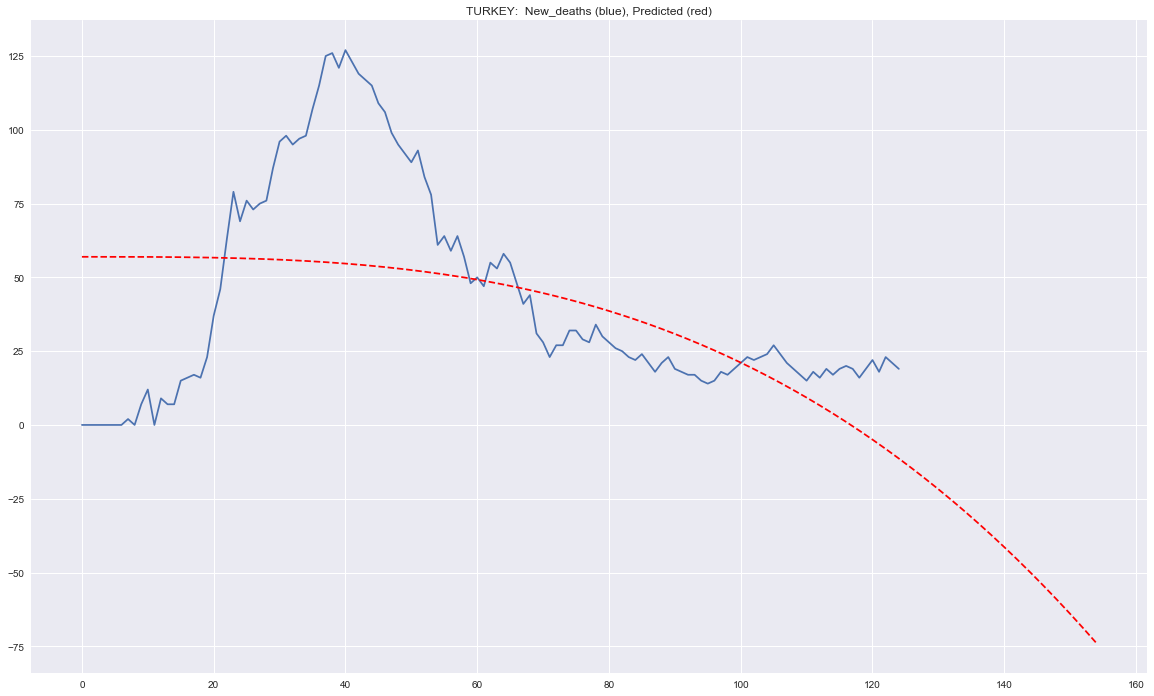

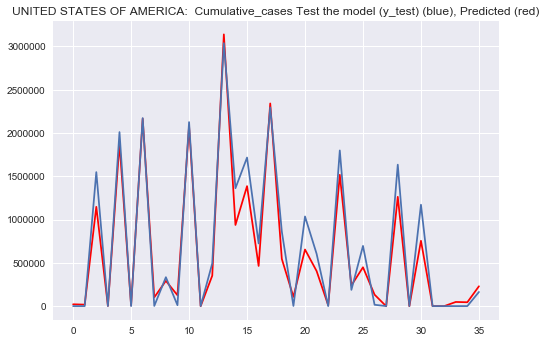

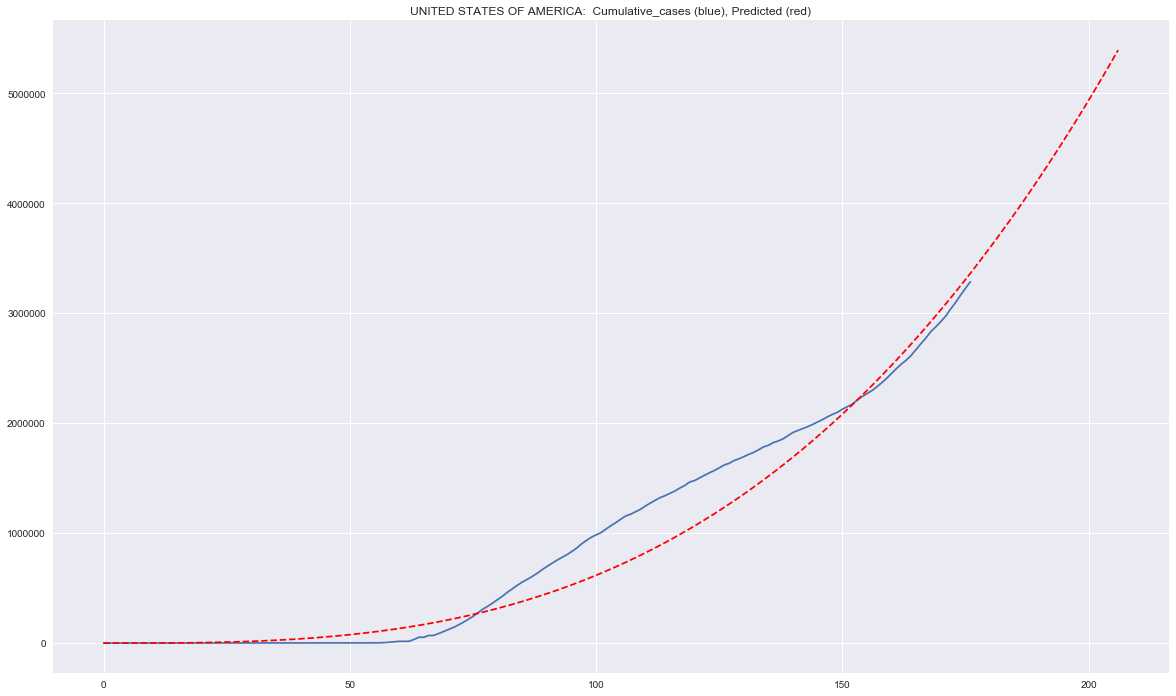

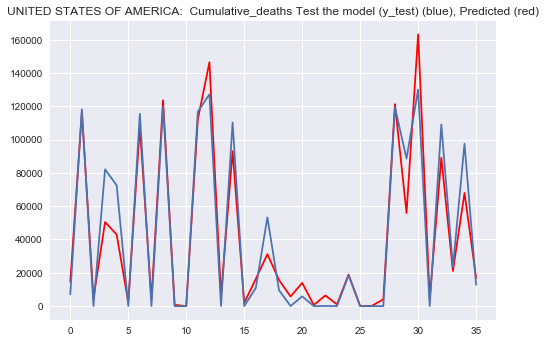

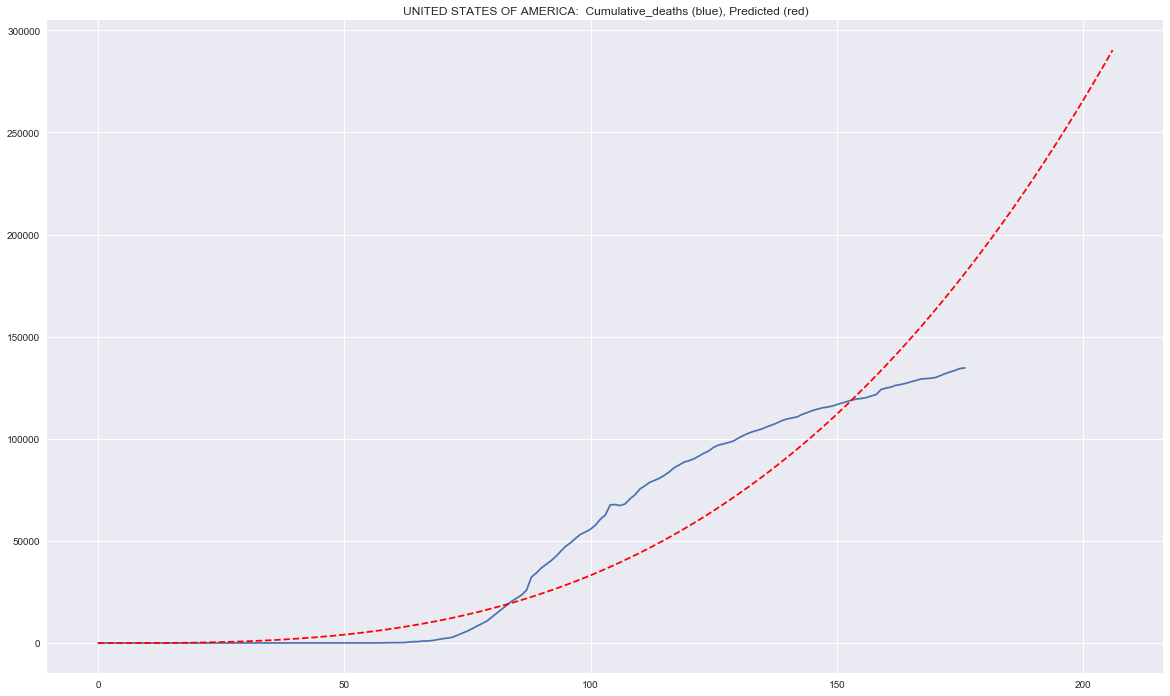

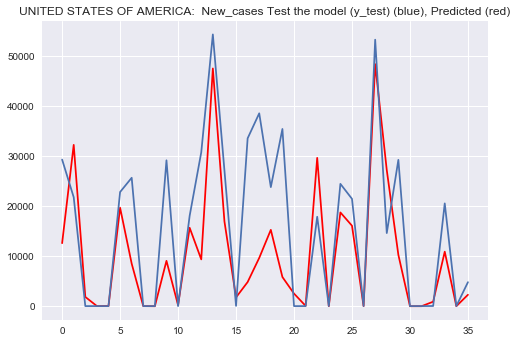

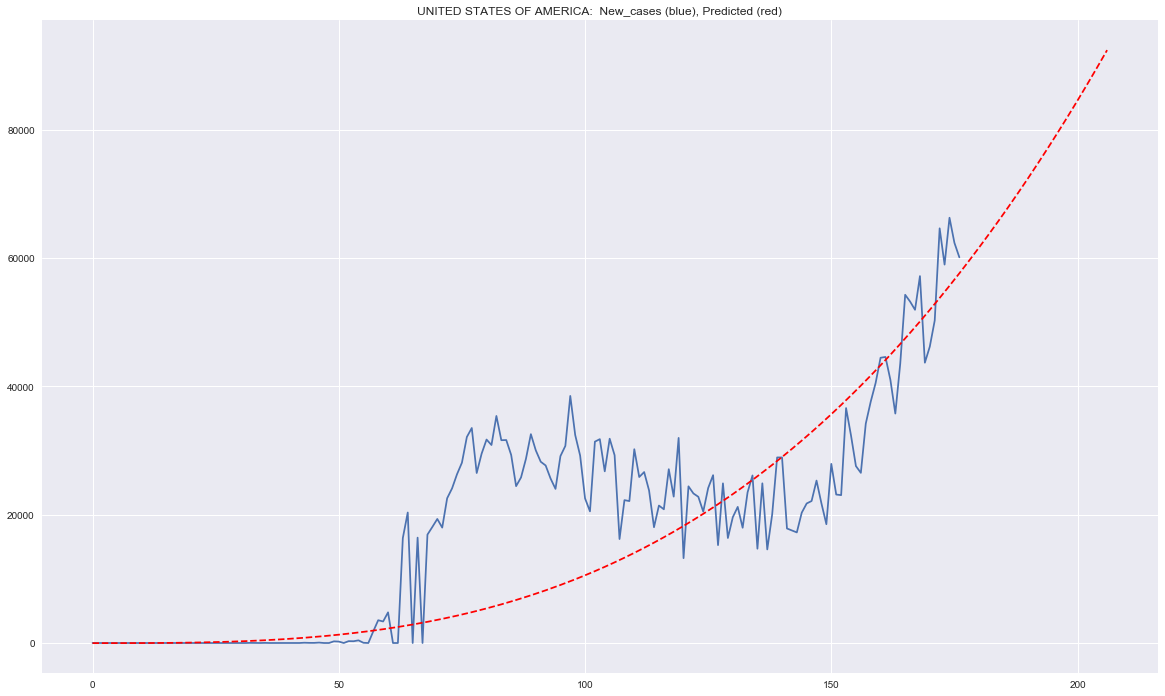

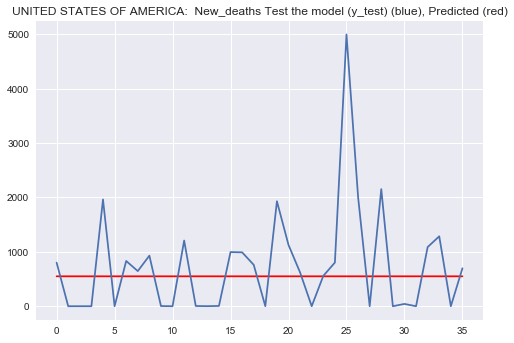

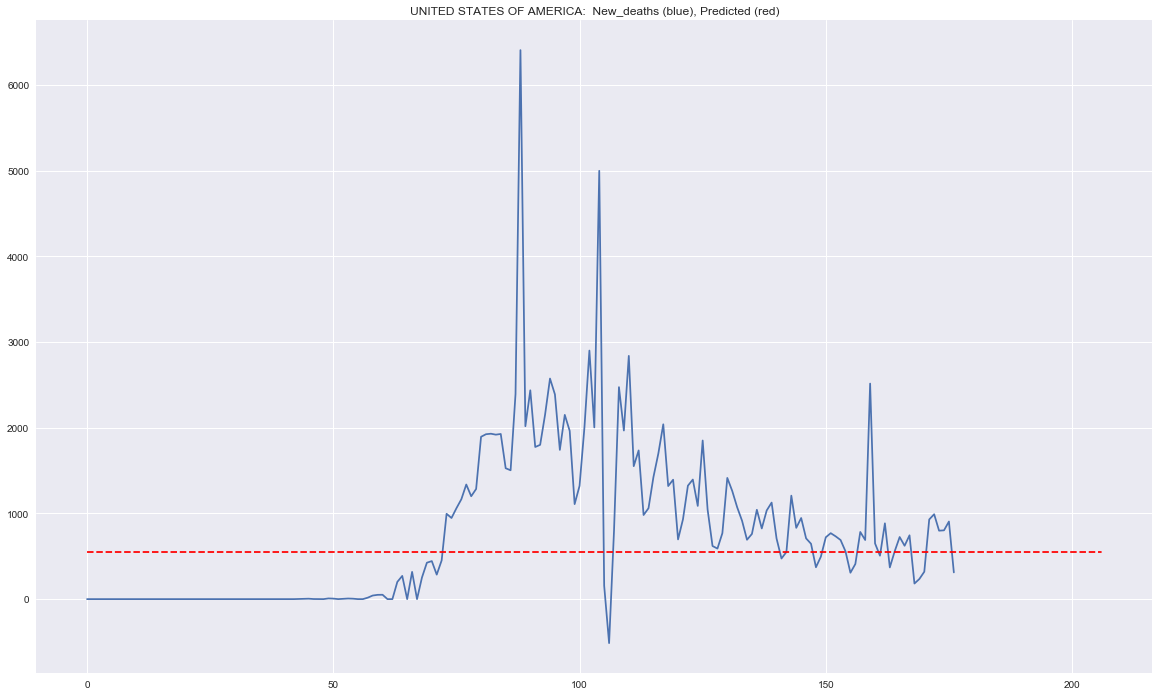

In [312]:
for country in worst_affected_countries:
    print(country)    
    df =who_data[who_data[' Country']==country].reset_index()
    df = df.drop(['index'], axis=1)
    Country = df[' Country'][0]
    Country_code =  df[' Country_code'][0]
    WHO_region = df[' WHO_region'][0]
    #add the 30 days
    df = df.append(pd.DataFrame({'Date_reported': pd.date_range(start=df['Date_reported'].iloc[-1], periods=31, freq='D', closed='right').date}))

    df = df.reset_index()
    df = df.drop(['index'], axis=1)

    df[' Country']      = Country
    df[' Country_code'] = Country_code
    df[' WHO_region']   = WHO_region
    pred_cumulative_cases   = one_country(country, ' Cumulative_cases')
    pred_cumulative_deaths  = one_country(country, ' Cumulative_deaths')
    pred_new_cases        = one_country(country, ' New_cases')
    pred_new_deaths       = one_country(country, ' New_deaths')
    
    df['PRED_CUMULATIVE_CASES'] = pred_cumulative_cases 
    df['PRED_CUMULATIVE_DEATHS'] = pred_cumulative_deaths 
    df['PRED_NEW_CASES'] = pred_new_cases
    df['PRED_NEW_DEATHS'] = pred_new_deaths
    
    df.to_csv('PredictionData/'+country+'.csv')
    

# Linear Regression model


In [ ]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression(normalize=True, fit_intercept=True)

linear_model.fit(X_train_confirmed, y_train_confirmed)

test_linear_pred = linear_model.predict(X_test_confirmed)

linear_pred = linear_model.predict(future_forecast)

print ('Mean Absolute Error', mean_absolute_error(test_linear_pred, y_test_confirmed))
print ('Mean Squared Error',  mean_squared_error(test_linear_pred, y_test_confirmed))

In [ ]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred, color="purple")


In [ ]:
#predictions for next 10 days
print('LINEAR REGRESSION PREDICTIONS')
print(linear_pred[-10:])

In [ ]:
xtrain = X_train_confirmed
ytrain = Y_train_confirmed
xtest  = X_test_confirmed
ytest  = Y_test_confirmed

regressor=SVR(kernel=’rbf’,epsilon=1.0)
regressor.fit(xtrain,ytrain)
pred=regressor.predict(xtest)
print(regressor.score(xtest,ytest))
print(r2_score(ytest,pred))